<a href="https://colab.research.google.com/github/zzaranghaeminiya/Final-Team6/blob/main/9/22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/combined_dataset.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11446 non-null  int64  
 1   listing_url                                   11446 non-null  object 
 2   scrape_id                                     11446 non-null  int64  
 3   last_scraped                                  11446 non-null  object 
 4   source                                        11446 non-null  object 
 5   name                                          11446 non-null  object 
 6   description                                   9276 non-null   object 
 7   neighborhood_overview                         5663 non-null   object 
 8   picture_url                                   11446 non-null  object 
 9   host_id                                       11446 non-null 

In [8]:
df['host_id'].value_counts()

,count
host_id,
227945,98
5463516,98
52431987,96
48640172,87
2420885,84
...,...
529269802,1
389463927,1
826315,1


In [65]:
df[df['host_id'] == 52431987]['host_is_superhost'].value_counts()

,count
host_is_superhost,
t,96


# 호스트 227945의 인기 비결을 파보자!!!

In [48]:
df[df['host_id'] == 227945]['host_is_superhost'].value_counts()

,count
host_is_superhost,
f,98


### 1. 평점

In [34]:
df[df['host_id'] == 227945]['review_scores_rating'].max()

5.0

In [16]:
df[df['host_id'] == 227945]['review_scores_rating'].mean()

np.float64(4.657708333333334)

In [40]:
df['review_scores_rating'].mean() #전체 평균

np.float64(4.682038991056175)

In [15]:
df[df['host_id'] == 227945]['review_scores_rating'].min()

4.34

In [22]:
(df[df['host_id'] == 227945]['review_scores_rating'] == 5.0).value_counts()

,count
review_scores_rating,
False,97
True,1


---

### 2. 리뷰 수

In [46]:
df[df['host_id'] == 227945]['number_of_reviews'].sort_values(ascending=False)

,number_of_reviews
163,507
232,498
856,485
402,481
1357,451
...,...
9592,40
9591,26
7753,8
8190,0


In [30]:
(df[df['host_id'] == 227945]['number_of_reviews'].sort_values(ascending=False) > 100).value_counts()

,count
number_of_reviews,
True,76
False,22


In [31]:
76/98

0.7755102040816326

In [32]:
(df[df['host_id'] == 227945]['number_of_reviews'].sort_values(ascending=False) > 200).value_counts()

,count
number_of_reviews,
True,54
False,44


In [33]:
54/98

0.5510204081632653

---

### 3. 응답율

In [37]:
df[df['host_id'] == 227945]['host_response_rate'].value_counts()

,count
host_response_rate,
99%,82
100%,16


In [39]:
82/98

0.8367346938775511

----

### 4. 취소율

In [38]:
df[df['host_id'] == 227945]['host_acceptance_rate'].value_counts()

,count
host_acceptance_rate,
100%,98


---

In [57]:
df['price'].str.replace('$','').replace(',','')

,price
0,"3,955.00"
1,"2,955.00"
2,"3,223.00"
3,"6,741.00"
4,"2,763.00"
...,...
11441,523.00
11442,"2,357.00"
11443,"1,120.00"
11444,"1,141.00"


In [52]:
df[df['host_id'] == 227945]['price']

,price
5,"$1,919.00"
6,NaN
7,"$2,434.00"
8,"$1,521.00"
20,"$1,695.00"
...,...
9397,NaN
9588,"$1,492.00"
9591,NaN
9592,NaN


#[결론]

예약 수가 가장 많은 호스트(227945)에게서 발견한 사실

0. 슈퍼호스트 X
1. 평점은 평균 평점보다 낮다. (4.66 < 4.68)
2. 최고 평점은 5.0 but, 98개 중 1개
3. 리뷰가 100개 이상인 숙소는 77%, 200개 이상인 숙소는 55% (인과관계가 불명확.... 일단은 pass)
4. 응답율은 99%가 83%, 100%가 17%
5. 취소율은 전부 0%

# 동순위인 호스트 5463516의 인기 비결도 살펴보자!!

In [49]:
df[df['host_id'] == 5463516]['host_is_superhost'].value_counts()

,count
host_is_superhost,
f,98


### 1. 평점

In [41]:
df[df['host_id'] == 5463516]['review_scores_rating'].max()

5.0

In [43]:
df[df['host_id'] == 5463516]['review_scores_rating'].mean()

np.float64(4.601063829787234)

In [44]:
df[df['host_id'] == 5463516]['review_scores_rating'].min()

3.33

---

# 2. 리뷰 수

In [59]:
df[df['host_id'] == 5463516]['number_of_reviews'].sort_values(ascending=False)

,number_of_reviews
158,412
1368,391
10379,336
1801,331
1766,316
...,...
7056,3
8344,0
8194,0
8188,0


In [58]:
(df[df['host_id'] == 5463516]['number_of_reviews'].sort_values(ascending=False) > 100).value_counts()

,count
number_of_reviews,
False,70
True,28


In [60]:
(df[df['host_id'] == 5463516]['number_of_reviews'].sort_values(ascending=False) > 200).value_counts()

,count
number_of_reviews,
False,85
True,13


---

### 3. 응답율

In [61]:
df[df['host_id'] == 5463516]['host_response_rate'].value_counts()

,count
host_response_rate,
100%,98


---

### 4. 취소율

In [62]:
df[df['host_id'] == 5463516]['host_acceptance_rate'].value_counts()

,count
host_acceptance_rate,
100%,98


--------

# 3위 !

In [76]:
df['minimum_nights']

,minimum_nights
0,1
1,1
2,3
3,1
4,7
...,...
11441,1
11442,2
11443,3
11444,1


In [75]:
(df['id'].value_counts() != 1).value_counts()

,count
count,
False,11446


In [80]:
clean = pd.read_csv('/content/top100_all_columns_comparison (1).csv')

In [81]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rank                                          100 non-null    int64  
 1   host_id                                       100 non-null    int64  
 2   id                                            100 non-null    float64
 3   listing_url                                   100 non-null    object 
 4   scrape_id                                     100 non-null    float64
 5   last_scraped                                  100 non-null    object 
 6   source                                        100 non-null    object 
 7   name                                          100 non-null    object 
 8   description                                   98 non-null     object 
 9   neighborhood_overview                         80 non-null     obje

----

In [6]:
# -*- coding: utf-8 -*-
"""
Airbnb 호스트 신뢰도 등급제 - '가설검증 전용' 스크립트
- ML 없음. 통계적 유의성만 확인.
- 파생변수 → 등급제 → 상관/ttest/ANOVA/카이제곱
"""

import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

# =========================
# 0) 데이터 로드
# =========================
df = pd.read_csv('/content/combined_dataset.csv')

# =========================
# 1) 유틸 함수
# =========================
def pct_to_float(s):
    """'97%' → 0.97, 숫자는 [0~1] 범위면 그대로, [1~100]이면 100으로 나눔, 그 외 NaN"""
    if pd.isna(s):
        return np.nan
    if isinstance(s, (int, float)):
        return float(s) / (100.0 if s > 1 else 1.0)
    s = str(s).strip()
    if s.endswith('%'):
        try:
            return float(s[:-1]) / 100.0
        except:
            return np.nan
    try:
        v = float(s)
        return v / (100.0 if v > 1 else 1.0)
    except:
        return np.nan

def map_response_time(x):
    """host_response_time 문자열 → 0~3 점수 매핑"""
    if pd.isna(x): return np.nan
    x = str(x).lower()
    if 'within an hour' in x or 'within 1 hour' in x: return 3
    if 'within a few hours' in x: return 2
    if 'within a day' in x: return 1
    if 'few days' in x: return 0
    return 1  # 기타는 중간값

def bool01(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().lower()
    if x in ['t','true','1','yes','y']: return 1.0
    if x in ['f','false','0','no','n']: return 0.0
    return np.nan

def months_since(d):
    """host_since → 개월 수"""
    if pd.isna(d): return np.nan
    try:
        return (datetime.today() - pd.to_datetime(d, errors='coerce')).days / 30.44
    except:
        return np.nan

def zscore(s):
    """결측 허용 z-score"""
    s = s.astype(float)
    return (s - np.nanmean(s)) / (np.nanstd(s) + 1e-9)

def drop_na_pair(df, cols):
    """가설검증 전: 지정 컬럼 동시 결측 제거하여 인덱스/길이 정렬"""
    sub = df[cols].copy()
    # 모두 숫자화 시도
    for c in cols:
        if sub[c].dtype == 'O':
            sub[c] = pd.to_numeric(sub[c], errors='coerce')
    return sub.dropna()

# =========================
# 2) 기본 정리 & 파생변수
# =========================
# 날짜
df['host_since_months'] = df['host_since'].apply(months_since) if 'host_since' in df.columns else np.nan
df['op_months'] = df['host_since_months'].fillna(1).clip(lower=1)

# 응답/수락률
for c in ['host_response_rate','host_acceptance_rate']:
    df[c + '_num'] = df[c].apply(pct_to_float) if c in df.columns else np.nan

# 응답시간 점수
df['host_response_time_score'] = df['host_response_time'].apply(map_response_time) if 'host_response_time' in df.columns else np.nan

# 불리언
for c in ['instant_bookable','host_identity_verified','host_has_profile_pic','host_is_superhost']:
    df[c + '_01'] = df[c].apply(bool01) if c in df.columns else np.nan

# 필수 수치 기본값 존재 보정
for c in ['number_of_reviews','reviews_per_month','number_of_reviews_l30d','host_listings_count','host_total_listings_count',
          'availability_365','minimum_nights','maximum_nights']:
    if c not in df.columns:
        df[c] = np.nan

# 활동성
df['reviews_per_month_filled'] = df['reviews_per_month'].fillna(0)
df['review_rate_per_month'] = df['number_of_reviews'] / df['op_months']
df['recent_review_ratio'] = df['number_of_reviews_l30d'] / df['number_of_reviews'].replace(0, np.nan)

activity_terms = pd.DataFrame({
    'rrpm_z' : zscore(df['review_rate_per_month']),
    'recent_ratio_z': zscore(df['recent_review_ratio']),
    'rpm_z' : zscore(df['reviews_per_month_filled'])
})
df['activity_index'] = activity_terms.mean(axis=1)

# 응답성
response_terms = pd.DataFrame({
    'resp_rate_z' : zscore(df['host_response_rate_num']),
    'acc_rate_z'  : zscore(df['host_acceptance_rate_num']),
    'resp_time_z' : zscore(df['host_response_time_score'])
})
df['response_index'] = response_terms.mean(axis=1)

# 운영 안정성
df['listings_cnt'] = df[['host_listings_count','host_total_listings_count']].max(axis=1)
df['listings_cnt'] = df['listings_cnt'].fillna(1).clip(lower=1)
df['avail_per_listing'] = df['availability_365'] / df['listings_cnt']

min_penalty = -zscore(np.log1p(df['minimum_nights']))
max_penalty = -zscore(np.log1p(df['maximum_nights']))

stability_terms = pd.DataFrame({
    'avail_per_listing_z': zscore(df['avail_per_listing']),
    'instant_bookable_z' : zscore(df['instant_bookable_01']),
    'min_penalty'        : min_penalty,
    'max_penalty'        : max_penalty
})
df['stability_index'] = stability_terms.mean(axis=1)

# 프로필 신뢰성
if 'host_verifications' in df.columns:
    def count_verifs(v):
        if isinstance(v, str) and v.strip().startswith('['):
            try:
                return len(eval(v))
            except:
                return np.nan
        return np.nan
    df['host_verifications_count'] = df['host_verifications'].apply(count_verifs)
else:
    df['host_verifications_count'] = np.nan

df['host_about_len'] = df['host_about'].fillna('').astype(str).str.len() if 'host_about' in df.columns else np.nan

cred_terms = pd.DataFrame({
    'idv_z'      : zscore(df['host_identity_verified_01']),
    'pic_z'      : zscore(df['host_has_profile_pic_01']),
    'verifs_z'   : zscore(df['host_verifications_count']),
    'about_len_z': zscore(df['host_about_len'])
})
df['credibility_index'] = cred_terms.mean(axis=1)

# 통합 신뢰지수(참고용; 가설검증에는 개별지수도 사용)
df['trust_index'] = pd.DataFrame({
    'activity_index'  : df['activity_index'],
    'response_index'  : df['response_index'],
    'stability_index' : df['stability_index'],
    'credibility_index': df['credibility_index']
}).mean(axis=1)

# 등급(사분위)
valid = df[['trust_index']].dropna()
qs = valid['trust_index'].quantile([0.25, 0.5, 0.75]).to_dict() if len(valid) > 0 else {0.25:0,0.5:0,0.75:0}

def to_grade(v):
    if pd.isna(v): return np.nan
    if v <= qs[0.25]: return 'Rookie'
    if v <= qs[0.5]: return 'Rising'
    if v <= qs[0.75]: return 'Super'
    return 'Master'
df['host_grade'] = df['trust_index'].apply(to_grade)

# 타깃(신뢰도 Proxy)
df['is_super'] = df['host_is_superhost_01']  # 범주(0/1)
HIGH_RATING_TH = 4.8
df['is_high_rating'] = (df['review_scores_rating'] >= HIGH_RATING_TH).astype(float)

# =========================
# 3) 가설검증 함수들
# =========================
def corr_test(df, x, y, method='pearson'):
    sub = drop_na_pair(df, [x, y])
    if len(sub) < 3:
        print(f"[상관] {x} ~ {y} : 유효 표본 부족 (n={len(sub)})")
        return
    if method == 'pearson':
        r, p = stats.pearsonr(sub[x].values, sub[y].values)
    else:
        r, p = stats.spearmanr(sub[x].values, sub[y].values)
    print(f"[상관-{method}] {x} ~ {y} : r={r:.3f}, p={p:.6f}, n={len(sub)}")

def t_test_groups(df, value_col, group_col, group1=1.0, group0=0.0):
    """두 집단 평균 비교: Welch t-test"""
    sub = df[[value_col, group_col]].dropna()
    g1 = sub.loc[sub[group_col]==group1, value_col].values
    g0 = sub.loc[sub[group_col]==group0, value_col].values
    if len(g1) < 2 or len(g0) < 2:
        print(f"[t-test] 표본 부족: {group_col}=={group1}({len(g1)}), {group_col}=={group0}({len(g0)})")
        return
    t, p = stats.ttest_ind(g1, g0, equal_var=False)
    print(f"[t-test] {value_col} by {group_col} : t={t:.3f}, p={p:.6f}, n1={len(g1)}, n0={len(g0)}")

def anova_by_grade(df, value_col, grade_col='host_grade'):
    sub = df[[value_col, grade_col]].dropna()
    if sub[grade_col].nunique() < 2:
        print(f"[ANOVA] 등급이 2개 미만 → 수행 불가")
        return
    groups = [g[value_col].values for _, g in sub.groupby(grade_col)]
    if not all(len(g) >= 2 for g in groups):
        print(f"[ANOVA] 그룹 표본 일부 부족: sizes={[len(g) for g in groups]}")
        return
    F, p = stats.f_oneway(*groups)
    print(f"[ANOVA] {value_col} by {grade_col} : F={F:.3f}, p={p:.6f}, sizes={[len(g) for g in groups]}")

def chi2_test(df, cat_a, cat_b):
    """카이제곱: 범주형-범주형 독립성 검정"""
    sub = df[[cat_a, cat_b]].dropna()
    # 값이 연속형일 수 있으니 이산화
    sub[cat_a] = (sub[cat_a] > 0.5).astype(int) if sub[cat_a].dtype.kind in "fc" else sub[cat_a]
    sub[cat_b] = (sub[cat_b] > 0.5).astype(int) if sub[cat_b].dtype.kind in "fc" else sub[cat_b]
    tab = pd.crosstab(sub[cat_a], sub[cat_b])
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        print(f"[Chi2] 유효한 교차표 부족:\n{tab}")
        return
    chi2, p, dof, exp = stats.chi2_contingency(tab)
    print(f"[Chi2] {cat_a} vs {cat_b} : chi2={chi2:.3f}, dof={dof}, p={p:.6f}\n{tab}")

# =========================
# 4) 가설 세팅 & 실행
# =========================
print("=== H1: 활동성/응답/운영/프로필 지수는 평점과 양(+)의 상관이 있다. ===")
for idx_col in ['activity_index','response_index','stability_index','credibility_index','trust_index']:
    corr_test(df, idx_col, 'review_scores_rating', method='pearson')
    corr_test(df, idx_col, 'review_scores_rating', method='spearman')

print("\n=== H2: 슈퍼호스트는 일반호스트보다 지수가 높다 (Welch t-test). ===")
for idx_col in ['activity_index','response_index','stability_index','credibility_index','trust_index']:
    t_test_groups(df, value_col=idx_col, group_col='is_super', group1=1.0, group0=0.0)

print("\n=== H3: 등급이 높을수록 평균 평점이 높다 (ANOVA). ===")
anova_by_grade(df, value_col='review_scores_rating', grade_col='host_grade')

print("\n=== H4: 특정 운영정책/특성이 고평점 또는 슈퍼호스트와 연관 (Chi-square). ===")
# instant_bookable ↔ 고평점/슈퍼호스트
chi2_test(df, 'instant_bookable_01', 'is_high_rating')
chi2_test(df, 'instant_bookable_01', 'is_super')
# 신분인증 ↔ 고평점/슈퍼호스트
chi2_test(df, 'host_identity_verified_01', 'is_high_rating')
chi2_test(df, 'host_identity_verified_01', 'is_super')

print("\n=== 요약 통계 (등급별) ===")
summary_cols = ['host_grade','review_scores_rating','number_of_reviews','reviews_per_month',
                'activity_index','response_index','stability_index','credibility_index','trust_index','is_super','is_high_rating']
exists = [c for c in summary_cols if c in df.columns]
if 'host_grade' in exists:
    print(df[exists].groupby('host_grade').agg(['mean','median','count']))
else:
    print("등급 컬럼(host_grade)이 없어 요약 불가(결측 과다일 수 있음).")


=== H1: 활동성/응답/운영/프로필 지수는 평점과 양(+)의 상관이 있다. ===
[상관-pearson] activity_index ~ review_scores_rating : r=0.113, p=0.000000, n=9951
[상관-spearman] activity_index ~ review_scores_rating : r=0.046, p=0.000004, n=9951
[상관-pearson] response_index ~ review_scores_rating : r=0.097, p=0.000000, n=9481
[상관-spearman] response_index ~ review_scores_rating : r=0.077, p=0.000000, n=9481
[상관-pearson] stability_index ~ review_scores_rating : r=-0.010, p=0.342509, n=9951
[상관-spearman] stability_index ~ review_scores_rating : r=-0.026, p=0.010222, n=9951
[상관-pearson] credibility_index ~ review_scores_rating : r=0.112, p=0.000000, n=9951
[상관-spearman] credibility_index ~ review_scores_rating : r=0.003, p=0.769388, n=9951
[상관-pearson] trust_index ~ review_scores_rating : r=0.138, p=0.000000, n=9951
[상관-spearman] trust_index ~ review_scores_rating : r=0.037, p=0.000185, n=9951

=== H2: 슈퍼호스트는 일반호스트보다 지수가 높다 (Welch t-test). ===
[t-test] activity_index by is_super : t=28.207, p=0.000000, n1=4078, n0=7095
[t-te

In [8]:
# -*- coding: utf-8 -*-
"""
호스트 신뢰도 등급제 (5개 기준):
1) 예약건수 (bookings_count)  → 많을수록 가점
2) 평점 (review_scores_rating) → 높을수록 가점
3) 응답률 (host_response_rate)  → 높을수록 가점
4) 예약 취소율 (cancellation_rate) → 낮을수록 가점 (역스코어)
5) 리뷰 수 (number_of_reviews) → 많을수록 가점

출력:
- 각 기준별 점수(0~3), 총점, 등급(host_grade)
- (옵션) 등급 vs 슈퍼호스트/고평점 통계 검정
"""

import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

# ============= 사용자 설정 =============

# 평점 절대 임계값
RATING_BINS = [4.5, 4.8, 4.95]  # <4.5=0, 4.5~<4.8=1, 4.8~<4.95=2, >=4.95=3

# 응답률 임계값 (비율)
RESP_BINS = [0.80, 0.90, 0.95]  # <0.80=0, 0.80~<0.90=1, 0.90~<0.95=2, >=0.95=3

# 취소율 임계값(낮을수록 좋음)
CANCEL_BINS = [0.10, 0.05, 0.01] # >0.10=0, 0.10~>0.05=1, 0.05~>0.01=2, <=0.01=3

# 총점 → 등급 컷오프
# 5개 지표 × 0~3점 = 최대 15점
GRADE_CUTOFFS = {
    "Master": 12,   # 12~15
    "Super":  9,    # 9~11
    "Rising": 6,    # 6~8
    "Rookie": -1    # 0~5
}

# ============= 유틸 =============
def pct_to_float(x):
    """'97%' -> 0.97, 97 -> 0.97, 0.97 -> 0.97"""
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)):
        return float(x)/100.0 if x > 1 else float(x)
    s = str(x).strip()
    if s.endswith('%'):
        try: return float(s[:-1]) / 100.0
        except: return np.nan
    try:
        v = float(s)
        return v/100.0 if v > 1 else v
    except:
        return np.nan

def months_since(d):
    if pd.isna(d): return np.nan
    try:
        return (datetime.today() - pd.to_datetime(d, errors='coerce')).days / 30.44
    except:
        return np.nan

def qscore_by_quantiles(series, labels=(0,1,2,3)):
    """하위→상위 4분위 기반 점수(0~3). 결측은 NaN."""
    s = pd.to_numeric(series, errors='coerce')
    try:
        q = s.quantile([0.25,0.5,0.75])
        return pd.cut(s, bins=[-np.inf, q[0.25], q[0.5], q[0.75], np.inf], labels=labels).astype(float)
    except Exception:
        return pd.Series(np.nan, index=s.index)

def binscore_by_thresholds(x, bins, reverse=False):
    """
    절대 임계값에 따른 0~3점.
    - reverse=False: 낮음→0, 높음→3 (예: 평점/응답률)
    - reverse=True : 낮음→3, 높음→0 (예: 취소율)
    bins 길이=3: [b0, b1, b2]
    """
    x = pd.to_numeric(x, errors='coerce')
    s = pd.Series(index=x.index, dtype=float)
    if not reverse:
        s[(x < bins[0])] = 0
        s[(x >= bins[0]) & (x < bins[1])] = 1
        s[(x >= bins[1]) & (x < bins[2])] = 2
        s[(x >= bins[2])] = 3
    else:
        s[(x >  bins[0])] = 0
        s[(x <= bins[0]) & (x >  bins[1])] = 1
        s[(x <= bins[1]) & (x >  bins[2])] = 2
        s[(x <= bins[2])] = 3
    return s

def make_grade(total_score, cutoffs):
    s = pd.Series(index=total_score.index, dtype=object)
    s[ total_score >= cutoffs["Master"] ] = "Master"
    s[(total_score >= cutoffs["Super"])  & (total_score < cutoffs["Master"])] = "Super"
    s[(total_score >= cutoffs["Rising"]) & (total_score < cutoffs["Super"]) ] = "Rising"
    s[ total_score <  cutoffs["Rising"] ] = "Rookie"
    return s

# ============= 데이터 로드 & 컬럼 준비 =============
df = pd.read_csv('/content/combined_dataset.csv')

# 1) 예약건수(bookings_count) 확보
# 가능한 컬럼 후보를 순차적으로 탐색
CAND_BOOK_COLS = ["bookings_count", "reservations_count", "reservation_count", "total_bookings"]
book_col = next((c for c in CAND_BOOK_COLS if c in df.columns), None)

if book_col is None:
    # 대체 추정: 리뷰수/월 × 운영개월수 vs 누적 리뷰수 중 큰 값 사용(조악하지만 결측 대체)
    if 'host_since' in df.columns:
        op_months = pd.Series(df['host_since'].apply(months_since)).fillna(1).clip(lower=1)
    else:
        op_months = pd.Series(1, index=df.index)  # 정보 없으면 1개월로 보수적 처리

    reviews_per_month = pd.to_numeric(df.get('reviews_per_month', np.nan), errors='coerce').fillna(0)
    number_of_reviews = pd.to_numeric(df.get('number_of_reviews', np.nan), errors='coerce').fillna(0)

    bookings_proxy_1 = (reviews_per_month * op_months)  # 활동 기반 추정
    bookings_proxy_2 = number_of_reviews                # 리뷰수 자체를 하한선으로
    df['bookings_count_est'] = np.maximum(bookings_proxy_1, bookings_proxy_2)
    book_col = 'bookings_count_est'
    print("[warn] bookings_count 컬럼 없음 → 추정치(bookings_count_est) 사용")
else:
    print(f"[info] 예약건수 컬럼 사용: {book_col}")

# 2) 평점
rating = pd.to_numeric(df.get('review_scores_rating', np.nan), errors='coerce')

# 3) 응답률
resp = df.get('host_response_rate', np.nan).apply(pct_to_float) if 'host_response_rate' in df.columns else pd.Series(np.nan, index=df.index)

# 4) 예약 취소율 (직접 컬럼이 없으면 cancellations_count/bookings_count 로 계산 시도)
CAND_CANCEL_COLS = ["host_cancellation_rate", "cancellation_rate", "cancel_rate"]
cancel_col = next((c for c in CAND_CANCEL_COLS if c in df.columns), None)
if cancel_col is None:
    if {'cancellations_count'}.issubset(df.columns) or 'cancellations_count' in df.columns:
        cancels = pd.to_numeric(df.get('cancellations_count', np.nan), errors='coerce')
        bookings = pd.to_numeric(df.get(book_col, np.nan), errors='coerce')
        cancel_rate = cancels / bookings.replace(0, np.nan)
        print("[warn] cancellation_rate 컬럼 없음 → cancellations_count / bookings 으로 산출")
    else:
        cancel_rate = pd.Series(np.nan, index=df.index)
        print("[warn] 취소율 관련 컬럼 없음 → cancel_rate=NaN")
else:
    # 퍼센트 또는 소수 형태 모두 처리
    cancel_rate = df[cancel_col].apply(pct_to_float)
    print(f"[info] 취소율 컬럼 사용: {cancel_col}")

# 5) 리뷰 수
reviews = pd.to_numeric(df.get('number_of_reviews', np.nan), errors='coerce')

# ============= 점수화(0~3) =============
# 예약건수/리뷰수는 분포 의존성이 크므로 4분위(상대 기준)로 스코어링
bookings_score = qscore_by_quantiles(df[book_col])          # 0~3
reviews_score  = qscore_by_quantiles(reviews)               # 0~3
rating_score   = binscore_by_thresholds(rating, RATING_BINS, reverse=False)
resp_score     = binscore_by_thresholds(resp,   RESP_BINS,   reverse=False)
cancel_score   = binscore_by_thresholds(cancel_rate, CANCEL_BINS, reverse=True)

score_cols = {
    'score_bookings': bookings_score,
    'score_rating'  : rating_score,
    'score_resp'    : resp_score,
    'score_cancel'  : cancel_score,
    'score_reviews' : reviews_score
}
scores = pd.DataFrame(score_cols)

# 총점(결측은 0점 처리 OR 평균대체 중 선택) → 기본은 0점 처리
scores_filled = scores.fillna(0)
total_score = scores_filled.sum(axis=1)

# 등급 산정
host_grade = make_grade(total_score, GRADE_CUTOFFS)

# 결과 병합
out = df.copy()
out = out.assign(
    **scores,
    total_score = total_score,
    host_grade  = host_grade
)

# ============= (옵션) 통계 검정 =============
# 신뢰도(고평점/슈퍼호스트)와 등급/특성 간 관계 확인
# 고평점 임계값
HIGH_RATING_TH = 4.8
is_high_rating = (rating >= HIGH_RATING_TH).astype(float)

# 슈퍼호스트
is_super = df.get('host_is_superhost', np.nan)
if is_super.dtype == 'O':
    is_super = is_super.map({'t':1, 'f':0, 'true':1, 'false':0}).astype(float)
elif is_super.dtype in [int, float, bool]:
    is_super = pd.Series(is_super, dtype=float)
else:
    is_super = pd.Series(np.nan, index=df.index)

def chi2(var_a, var_b, name_a, name_b):
    sub = pd.DataFrame({'a':var_a, 'b':var_b}).dropna()
    if sub.empty:
        print(f"[Chi2] {name_a} vs {name_b}: 유효 표본 없음")
        return
    # 연속형이면 이산화
    if sub['a'].dtype.kind in "fc":
        sub['a'] = (sub['a'] > sub['a'].median()).astype(int)
    if sub['b'].dtype.kind in "fc":
        sub['b'] = (sub['b'] > sub['b'].median()).astype(int)
    tab = pd.crosstab(sub['a'], sub['b'])
    if min(tab.shape) < 2:
        print(f"[Chi2] {name_a} vs {name_b}: 교차표 축이 1입니다\n{tab}")
        return
    chi2, p, dof, _ = stats.chi2_contingency(tab)
    print(f"[Chi2] {name_a} vs {name_b}: chi2={chi2:.3f}, dof={dof}, p={p:.6f}\n{tab}\n")

def anova_grade_on_rating():
    sub = pd.DataFrame({'grade':host_grade, 'rating':rating}).dropna()
    if sub['grade'].nunique() < 2:
        print("[ANOVA] 등급 수준이 2 미만")
        return
    groups = [g['rating'].values for _, g in sub.groupby('grade')]
    if not all(len(g)>=2 for g in groups):
        print("[ANOVA] 일부 그룹 표본 부족")
        return
    F,p = stats.f_oneway(*groups)
    print(f"[ANOVA] review_scores_rating by host_grade: F={F:.3f}, p={p:.6f}, sizes={[len(g) for g in groups]}")

print("\n=== 통계 검정(옵션) ===")
anova_grade_on_rating()                               # 등급 ↔ 평점 (주의: 평점이 입력지표에도 포함되어 있어 부분적으로 순환성 존재)
chi2(host_grade.map({'Rookie':0,'Rising':1,'Super':2,'Master':3}), is_super, "host_grade", "is_super")
chi2(host_grade.map({'Rookie':0,'Rising':1,'Super':2,'Master':3}), is_high_rating, "host_grade", "is_high_rating")

# ============= 저장/요약 =============
# 주요 컬럼만 내보내기
keep = [
    'id','host_id','listing_url','name',
    book_col, 'review_scores_rating','host_response_rate',
    cancel_col if cancel_col else 'cancellations_count',
    'number_of_reviews',
    'score_bookings','score_rating','score_resp','score_cancel','score_reviews',
    'total_score','host_grade'
]
keep = [c for c in keep if c in out.columns]

out[keep].head(10).to_csv("/content/host_grades_preview.csv", index=False)
out.to_csv("/content/host_grades_full.csv", index=False)

print("\n[done] 등급 산정 완료.")
print("- 미리보기 저장: /content/data/host_grades_preview.csv")
print("- 전체 저장   : /content/host_grades_full.csv")

# 간단 요약
print("\n=== 등급 분포 ===")
print(out['host_grade'].value_counts(dropna=False))

print("\n=== 등급별 요약(평균) ===")
print(out.groupby('host_grade')[['total_score','review_scores_rating', book_col, 'number_of_reviews']].mean().round(3))


[warn] bookings_count 컬럼 없음 → 추정치(bookings_count_est) 사용
[warn] 취소율 관련 컬럼 없음 → cancel_rate=NaN

=== 통계 검정(옵션) ===
[ANOVA] review_scores_rating by host_grade: F=867.262, p=0.000000, sizes=[162, 3710, 2162, 3917]
[Chi2] host_grade vs is_super: chi2=2405.022, dof=3, p=0.000000
b     0     1
a            
0  3131   372
1  2479  1133
2  1481  2416
3     4   157

[Chi2] host_grade vs is_high_rating: chi2=2182.073, dof=3, p=0.000000
b     0     1
a            
0  3110   547
1  1891  1819
2  1378  2539
3     0   162


[done] 등급 산정 완료.
- 미리보기 저장: /content/data/host_grades_preview.csv
- 전체 저장   : /content/host_grades_full.csv

=== 등급 분포 ===
host_grade
Super     3917
Rising    3710
Rookie    3657
Master     162
Name: count, dtype: int64

=== 등급별 요약(평균) ===
            total_score  review_scores_rating  bookings_count_est  \
host_grade                                                          
Master           12.000                 4.967             490.693   
Rising            7.064              

In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# host_grade, review_scores_rating, host_is_superhost, is_high_rating 포함된 df 필요
# (앞에서 만든 out 데이터프레임 사용)

# 평점 ≥ 4.8 고평점 여부
HIGH_RATING_TH = 4.8
out['is_high_rating'] = (out['review_scores_rating'] >= HIGH_RATING_TH).astype(float)

# 슈퍼호스트 변수 정리
is_super = out['host_is_superhost']
if is_super.dtype == 'O':
    out['is_super'] = is_super.map({'t':1,'f':0,'true':1,'false':0})
else:
    out['is_super'] = pd.to_numeric(is_super, errors='coerce')

# === H1: 등급 ↔ 평점 (ANOVA) ===
sub = out[['host_grade','review_scores_rating']].dropna()
groups = [g['review_scores_rating'].values for _, g in sub.groupby('host_grade')]
if all(len(g) >= 2 for g in groups) and len(groups) > 1:
    F, p = stats.f_oneway(*groups)
    print(f"[ANOVA] 평점 by host_grade: F={F:.3f}, p={p:.6f}, sizes={[len(g) for g in groups]}")
else:
    print("[ANOVA] 표본 부족")

# === H2: 등급 ↔ 슈퍼호스트 여부 (Chi-square) ===
tab1 = pd.crosstab(out['host_grade'], out['is_super'])
chi2, p, dof, _ = stats.chi2_contingency(tab1)
print(f"[Chi2] host_grade vs is_super: chi2={chi2:.3f}, dof={dof}, p={p:.6f}\n{tab1}\n")

# === H3: 등급 ↔ 고평점 여부 (Chi-square) ===
tab2 = pd.crosstab(out['host_grade'], out['is_high_rating'])
chi2, p, dof, _ = stats.chi2_contingency(tab2)
print(f"[Chi2] host_grade vs is_high_rating: chi2={chi2:.3f}, dof={dof}, p={p:.6f}\n{tab2}\n")


[ANOVA] 평점 by host_grade: F=867.262, p=0.000000, sizes=[162, 3710, 2162, 3917]
[Chi2] host_grade vs is_super: chi2=2405.022, dof=3, p=0.000000
is_super     0.0   1.0
host_grade            
Master         4   157
Rising      2479  1133
Rookie      3131   372
Super       1481  2416

[Chi2] host_grade vs is_high_rating: chi2=2182.073, dof=3, p=0.000000
is_high_rating   0.0   1.0
host_grade                
Master             0   162
Rising          1891  1819
Rookie          3110   547
Super           1378  2539



In [14]:
#한글 글씨 폰트 설치 (설치 후 런타임 재실행)
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

#음수 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

/tmp/ipython-input-251802868.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  super_rate = df.groupby('host_grade')['is_super'].mean().reindex(GRADE_ORDER)


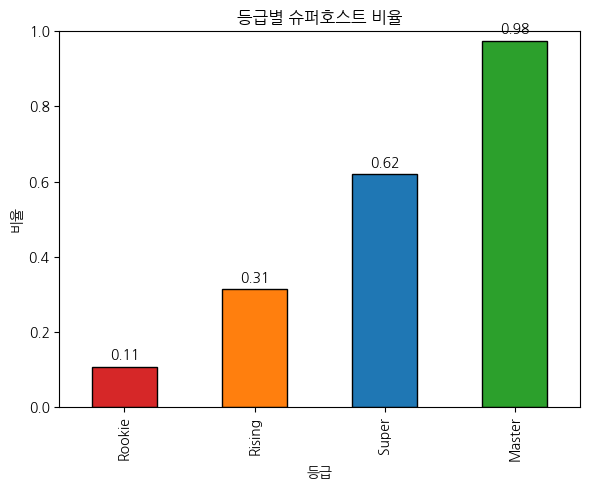

/tmp/ipython-input-251802868.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_rate = df.groupby('host_grade')['is_high_rating'].mean().reindex(GRADE_ORDER)


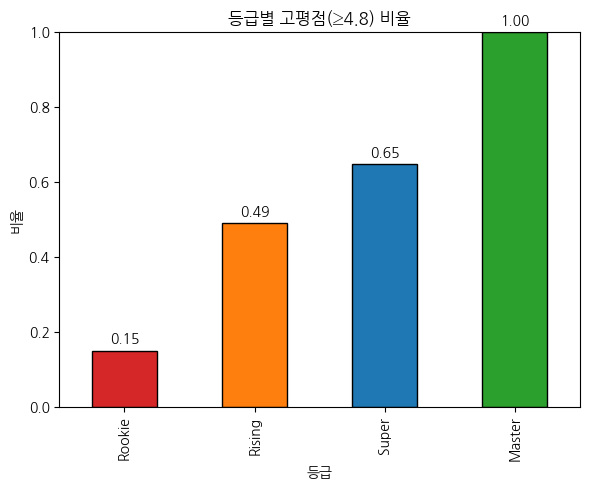

/tmp/ipython-input-251802868.py:191: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=GRADE_ORDER, showmeans=True, patch_artist=True)


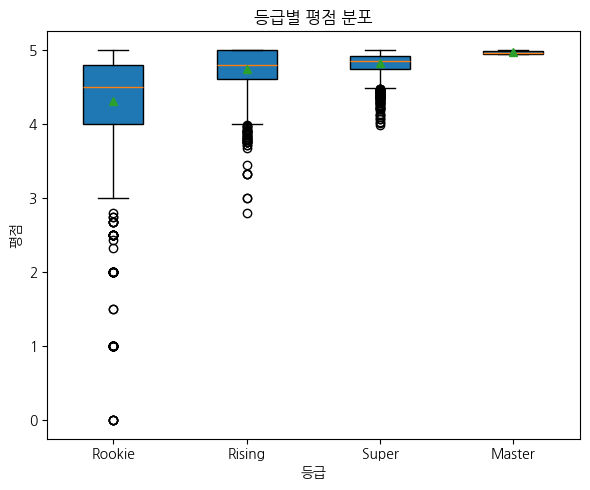

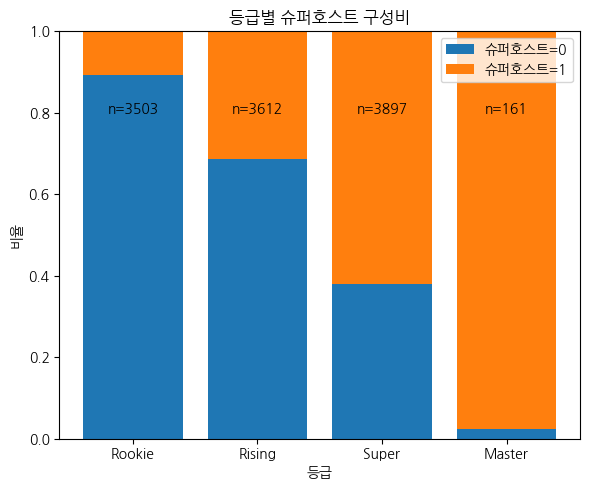

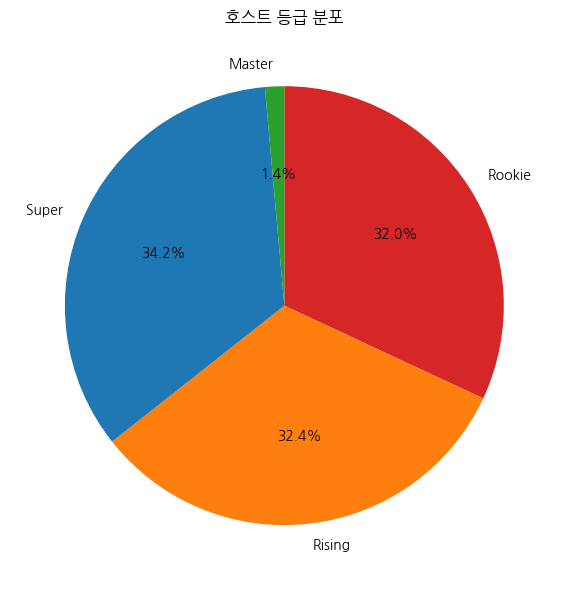

Saved figures:
- /content/grade_super_rate.png
- /content/grade_highrate.png
- /content/grade_rating_box.png
- /content/grade_super_stacked.png
- /content/grade_distribution_pie.png


In [16]:
# -*- coding: utf-8 -*-
# 등급제(5기준) 결과를 이용한 슬라이드용 그래프 생성
# 파일 저장: /mnt/data/grade_super_rate.png, grade_highrate.png, grade_rating_box.png, grade_super_stacked.png

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# -----------------------------
# 경로 설정
# -----------------------------
PATH_FULL = "/content/host_grades_full.csv"
PATH_RAW  = "/content/combined_dataset.csv"

# 등급 순서 고정
GRADE_ORDER = ["Rookie","Rising","Super","Master"]

# (fallback용) 점수 기준 – 너가 쓰던 값과 동일
RATING_BINS = [4.5, 4.8, 4.95]
RESP_BINS   = [0.80, 0.90, 0.95]
CANCEL_BINS = [0.10, 0.05, 0.01]
GRADE_CUTOFFS = {"Master":12, "Super":9, "Rising":6, "Rookie":-1}

# -----------------------------
# 유틸 (fallback 계산시 사용)
# -----------------------------
def pct_to_float(x):
    if pd.isna(x): return np.nan
    if isinstance(x,(int,float)): return float(x)/100.0 if x>1 else float(x)
    s=str(x).strip()
    if s.endswith("%"):
        try: return float(s[:-1])/100.0
        except: return np.nan
    try:
        v=float(s); return v/100.0 if v>1 else v
    except: return np.nan

def months_since(d):
    if pd.isna(d): return np.nan
    try: return (datetime.today() - pd.to_datetime(d, errors="coerce")).days / 30.44
    except: return np.nan

def qscore_by_quantiles(series):
    s = pd.to_numeric(series, errors="coerce")
    try:
        q = s.quantile([0.25,0.5,0.75])
        return pd.cut(s, bins=[-np.inf,q[0.25],q[0.5],q[0.75],np.inf], labels=[0,1,2,3]).astype(float)
    except:  # 데이터가 너무 적거나 전부 같은 값인 경우
        return pd.Series(np.nan, index=s.index)

def binscore_by_thresholds(x, bins, reverse=False):
    x = pd.to_numeric(x, errors="coerce")
    out = pd.Series(index=x.index, dtype=float)
    if not reverse:
        out[(x < bins[0])] = 0
        out[(x >= bins[0]) & (x < bins[1])] = 1
        out[(x >= bins[1]) & (x < bins[2])] = 2
        out[(x >= bins[2])] = 3
    else:
        out[(x >  bins[0])] = 0
        out[(x <= bins[0]) & (x >  bins[1])] = 1
        out[(x <= bins[1]) & (x >  bins[2])] = 2
        out[(x <= bins[2])] = 3
    return out

def make_grade(total_score):
    s = pd.Series(index=total_score.index, dtype=object)
    s[ total_score >= GRADE_CUTOFFS["Master"] ] = "Master"
    s[(total_score >= GRADE_CUTOFFS["Super"])  & (total_score < GRADE_CUTOFFS["Master"])] = "Super"
    s[(total_score >= GRADE_CUTOFFS["Rising"]) & (total_score < GRADE_CUTOFFS["Super"]) ] = "Rising"
    s[ total_score <  GRADE_CUTOFFS["Rising"] ] = "Rookie"
    return s

# -----------------------------
# 데이터 로드 (host_grades_full.csv 우선)
# -----------------------------
if os.path.exists(PATH_FULL):
    df = pd.read_csv(PATH_FULL)
else:
    # 원본에서 등급 재산출 (네가 쓰던 로직 축약)
    df = pd.read_csv(PATH_RAW)

    # 예약건수
    CAND_BOOK_COLS = ["bookings_count","reservations_count","reservation_count","total_bookings"]
    book_col = next((c for c in CAND_BOOK_COLS if c in df.columns), None)
    if book_col is None:
        op_months = (df['host_since'].apply(months_since) if 'host_since' in df.columns else pd.Series(1, index=df.index)).fillna(1).clip(lower=1)
        reviews_per_month = pd.to_numeric(df.get('reviews_per_month', np.nan), errors='coerce').fillna(0)
        number_of_reviews = pd.to_numeric(df.get('number_of_reviews', np.nan), errors='coerce').fillna(0)
        df['bookings_count_est'] = np.maximum(reviews_per_month * op_months, number_of_reviews)
        book_col = 'bookings_count_est'

    # 핵심 지표
    rating = pd.to_numeric(df.get('review_scores_rating', np.nan), errors='coerce')
    resp   = df.get('host_response_rate', np.nan).apply(pct_to_float) if 'host_response_rate' in df.columns else pd.Series(np.nan, index=df.index)

    CAND_CANCEL_COLS = ["host_cancellation_rate","cancellation_rate","cancel_rate"]
    cancel_col = next((c for c in CAND_CANCEL_COLS if c in df.columns), None)
    if cancel_col is None:
        if 'cancellations_count' in df.columns:
            cancels = pd.to_numeric(df.get('cancellations_count', np.nan), errors='coerce')
            bookings = pd.to_numeric(df.get(book_col, np.nan), errors='coerce')
            cancel_rate = cancels / bookings.replace(0, np.nan)
        else:
            cancel_rate = pd.Series(np.nan, index=df.index)
    else:
        cancel_rate = df[cancel_col].apply(pct_to_float)

    reviews = pd.to_numeric(df.get('number_of_reviews', np.nan), errors='coerce')

    # 점수화 & 등급
    scores = pd.DataFrame({
        'score_bookings': qscore_by_quantiles(df[book_col]),
        'score_rating'  : binscore_by_thresholds(rating, RATING_BINS, reverse=False),
        'score_resp'    : binscore_by_thresholds(resp,   RESP_BINS,   reverse=False),
        'score_cancel'  : binscore_by_thresholds(cancel_rate, CANCEL_BINS, reverse=True),
        'score_reviews' : qscore_by_quantiles(reviews)
    }).fillna(0)

    total_score = scores.sum(axis=1)
    df['host_grade'] = make_grade(total_score)

# -----------------------------
# 파생 변수 정리: 슈퍼호스트/고평점
# -----------------------------
is_super = df.get('host_is_superhost')
if is_super is not None and is_super.dtype == 'O':
    df['is_super'] = is_super.map({'t':1,'f':0,'true':1,'false':0})
else:
    df['is_super'] = pd.to_numeric(is_super, errors='coerce')

df['review_scores_rating'] = pd.to_numeric(df.get('review_scores_rating', np.nan), errors='coerce')
df['is_high_rating'] = (df['review_scores_rating'] >= 4.8).astype(float)

# 등급 순서 고정
df['host_grade'] = pd.Categorical(df['host_grade'], categories=GRADE_ORDER, ordered=True)

GRADE_COLORS = {
    "Rookie": "#d62728",   # 빨강
    "Rising": "#ff7f0e",   # 주황
    "Super":  "#1f77b4",   # 파랑
    "Master": "#2ca02c"    # 초록
}


# -----------------------------
# 그래프 1: 등급별 슈퍼호스트 비율 (bar)
# -----------------------------
super_rate = df.groupby('host_grade')['is_super'].mean().reindex(GRADE_ORDER)

plt.figure(figsize=(6,5))
super_rate.plot(kind='bar',
                color=[GRADE_COLORS[g] for g in GRADE_ORDER],  # 등급 순서별 색상 지정
                edgecolor='black')
plt.title("등급별 슈퍼호스트 비율")
plt.xlabel("등급")
plt.ylabel("비율")
plt.ylim(0, 1)
for i, v in enumerate(super_rate.fillna(0)):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.savefig("/content/grade_super_rate.png", dpi=220)
plt.show()

# -----------------------------
# 그래프 2: 등급별 고평점(≥4.8) 비율 (bar)
# -----------------------------
high_rate = df.groupby('host_grade')['is_high_rating'].mean().reindex(GRADE_ORDER)

plt.figure(figsize=(6,5))
high_rate.plot(kind='bar',
               color=[GRADE_COLORS[g] for g in GRADE_ORDER],
                edgecolor='black')
plt.title("등급별 고평점(≥4.8) 비율")
plt.xlabel("등급")
plt.ylabel("비율")
plt.ylim(0, 1)
for i, v in enumerate(high_rate.fillna(0)):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.savefig("/content/grade_highrate.png", dpi=220)
plt.show()

# -----------------------------
# 그래프 3: 등급별 평점 분포 (boxplot)
# -----------------------------
plt.figure(figsize=(6,5))
data_for_box = [df.loc[df['host_grade']==g, 'review_scores_rating'].dropna().values for g in GRADE_ORDER]
plt.boxplot(data_for_box, labels=GRADE_ORDER, showmeans=True, patch_artist=True)
for patch, g in zip(plt.gca().artists, GRADE_ORDER):
    patch.set_facecolor(GRADE_COLORS[g])
plt.title("등급별 평점 분포")
plt.xlabel("등급")
plt.ylabel("평점")
plt.tight_layout()
plt.savefig("/content/grade_rating_box.png", dpi=220)
plt.show()

# -----------------------------
# 그래프 4: 등급×슈퍼호스트 구성비 (누적 막대, 발표용)
# -----------------------------
tab = pd.crosstab(df['host_grade'], df['is_super']).reindex(GRADE_ORDER)
# 비율로 변환
tab_ratio = tab.div(tab.sum(axis=1), axis=0)

plt.figure(figsize=(6,5))
bottom = np.zeros(len(tab_ratio))
for col in sorted(tab_ratio.columns):  # 0.0 먼저, 1.0 다음
    vals = tab_ratio[col].values
    plt.bar(GRADE_ORDER, vals, bottom=bottom, label=f"슈퍼호스트={int(col)}")
    bottom += vals
plt.title("등급별 슈퍼호스트 구성비")
plt.xlabel("등급")
plt.ylabel("비율")
plt.ylim(0, 1)
plt.legend(loc="upper right")
for i, total in enumerate(tab_ratio.sum(axis=1).values):
    plt.text(i, 0.8, f"n={int(tab.sum(axis=1).iloc[i])}", ha='center')
plt.tight_layout()
plt.savefig("/content/grade_super_stacked.png", dpi=220)
plt.show()


# -----------------------------
# 그래프 5: 등급 분포 (파이차트)
# -----------------------------
grade_counts = df['host_grade'].value_counts().reindex(GRADE_ORDER)

plt.figure(figsize=(6,6))
plt.pie(
    grade_counts,
    labels=GRADE_ORDER,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=[GRADE_COLORS[g] for g in GRADE_ORDER]
)
plt.title("호스트 등급 분포")
plt.tight_layout()
plt.savefig("/content/grade_distribution_pie.png", dpi=220)
plt.show()


print("Saved figures:")
print("- /content/grade_super_rate.png")
print("- /content/grade_highrate.png")
print("- /content/grade_rating_box.png")
print("- /content/grade_super_stacked.png")
print("- /content/grade_distribution_pie.png")


-------

#2번 코드입니다!!!

### 근데 이건 아닌 듯..

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 불러오기
df = pd.read_csv("/content/combined_dataset.csv")

# 결과 변수
rating = pd.to_numeric(df.get("review_scores_rating"), errors="coerce")
is_super = df.get("host_is_superhost")
if is_super is not None and is_super.dtype == "O":
    is_super = is_super.map({"t":1,"f":0,"true":1,"false":0})
is_super = pd.to_numeric(is_super, errors="coerce")

# 수치형 feature 후보
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ["id","review_scores_rating"]]
features = df[num_cols].copy()

# ===== 1. 결측값 처리 (전체 중앙값 → 남으면 0) =====
features = features.fillna(features.median(numeric_only=True)).fillna(0)

# ===== 2. 상관 높은 변수 선택 =====
corrs = {}
for c in features.columns:
    try:
        corrs[c] = abs(np.corrcoef(features[c], rating.fillna(0))[0,1])
    except Exception:
        corrs[c] = 0
top_vars = sorted(corrs, key=corrs.get, reverse=True)[:5]
print("선택된 상위 변수:", top_vars)

# 선택된 변수 결측 재처리 (안전장치)
features[top_vars] = features[top_vars].fillna(features[top_vars].median()).fillna(0)

# ===== 3. Quantile 기반 등급 =====
score = features[top_vars].sum(axis=1)
df["grade_quantile"] = pd.qcut(score.rank(method="first"), 4, labels=["Rookie","Rising","Super","Master"])

# ===== 4. KMeans 기반 등급 =====
scaler = StandardScaler()
Xz = scaler.fit_transform(features[top_vars].values)   # 이제 NaN 없어야 함
kmeans = KMeans(n_clusters=4, n_init=50, random_state=42)
clusters = kmeans.fit_predict(Xz)

# 클러스터 → 등급 매핑 (평균 평점 순서대로)
order = pd.DataFrame({"c":clusters,"rating":rating}).groupby("c")["rating"].mean().sort_values().index.tolist()
c2g = {order[i]: g for i, g in enumerate(["Rookie","Rising","Super","Master"])}
df["grade_kmeans"] = pd.Series(clusters).map(c2g)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


선택된 상위 변수: ['neighbourhood_group_cleansed', 'calendar_updated', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews']


/tmp/ipython-input-2304807168.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)


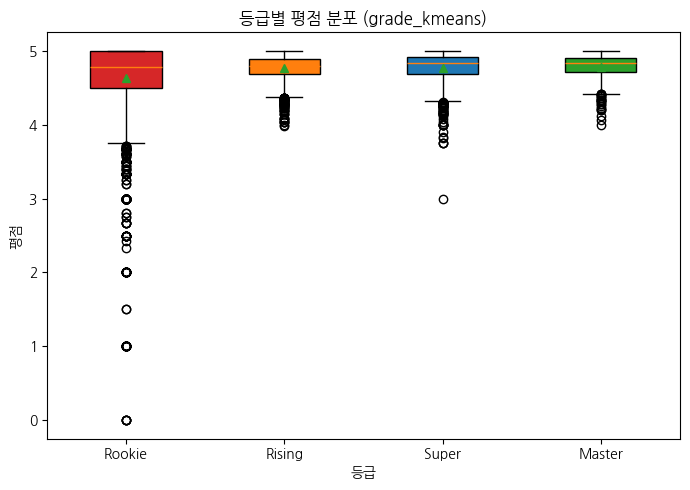

[saved] /content/box_rating_by_grade_kmeans.png


/tmp/ipython-input-2304807168.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)


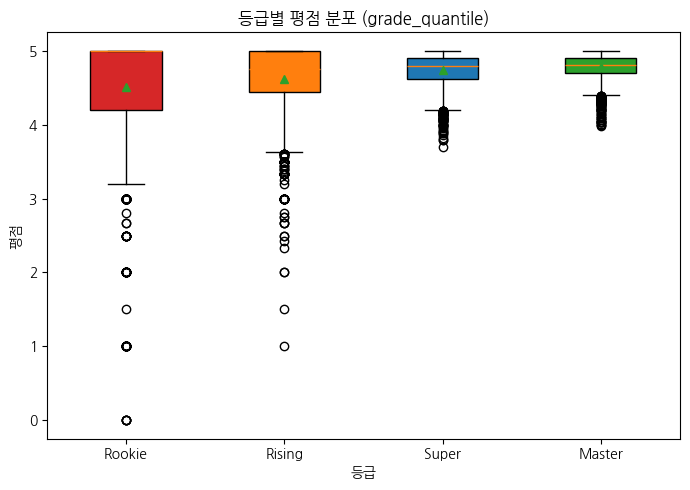

[saved] /content/box_rating_by_grade_quantile.png


/tmp/ipython-input-2304807168.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = sub.groupby(grade_col)[target_col].mean().reindex(GRADE_ORDER)


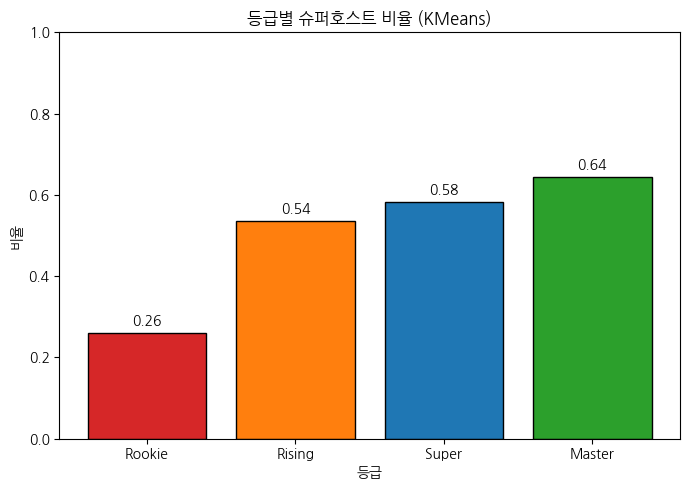

[saved] /content/bar_super_rate_kmeans.png


/tmp/ipython-input-2304807168.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = sub.groupby(grade_col)[target_col].mean().reindex(GRADE_ORDER)


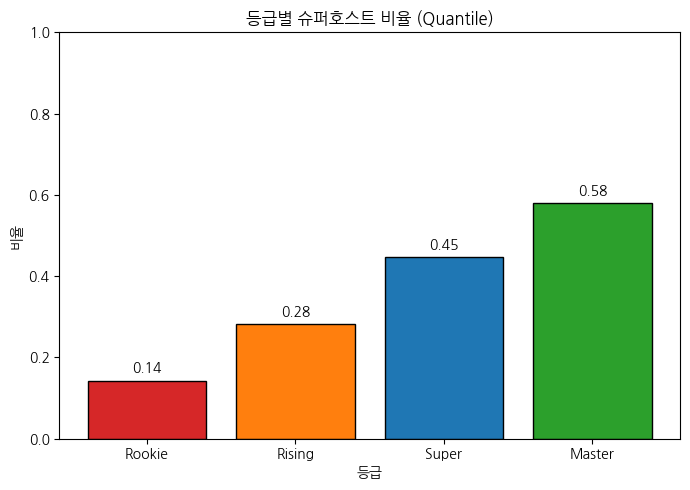

[saved] /content/bar_super_rate_quantile.png


/tmp/ipython-input-2304807168.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = sub.groupby(grade_col)[target_col].mean().reindex(GRADE_ORDER)


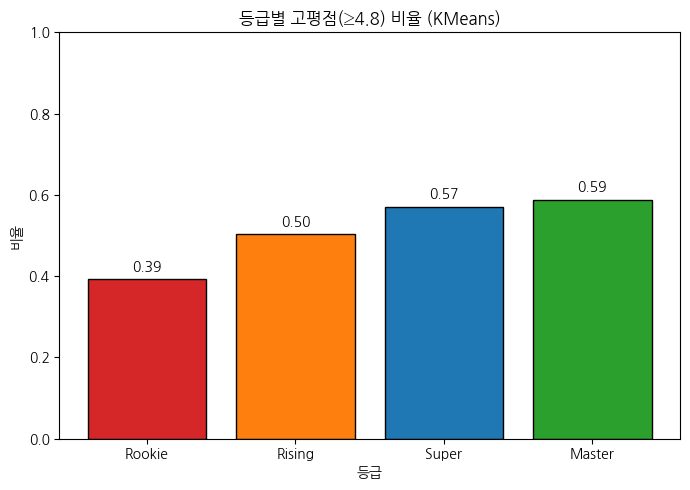

[saved] /content/bar_high_rate_kmeans.png


/tmp/ipython-input-2304807168.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = sub.groupby(grade_col)[target_col].mean().reindex(GRADE_ORDER)


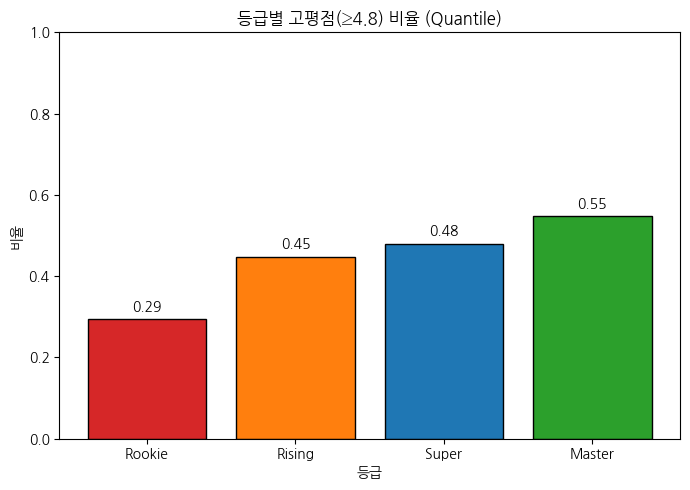

[saved] /content/bar_high_rate_quantile.png


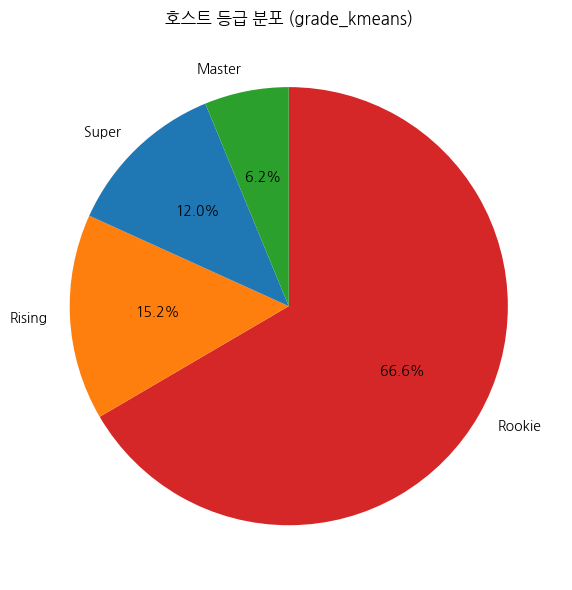

[saved] /content/pie_grade_kmeans.png


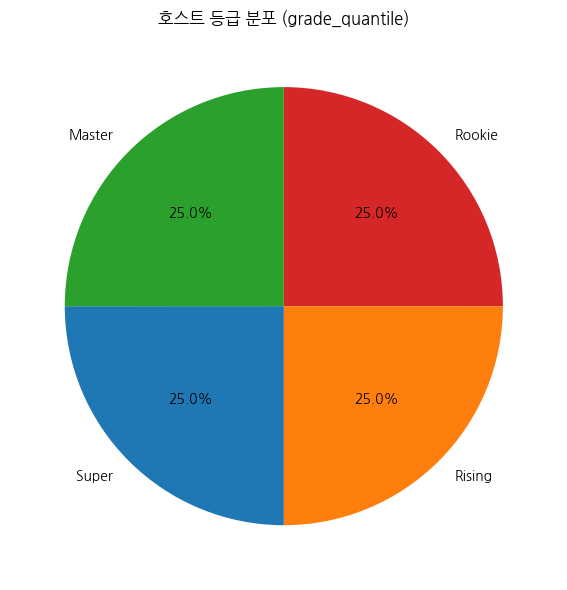

[saved] /content/pie_grade_quantile.png


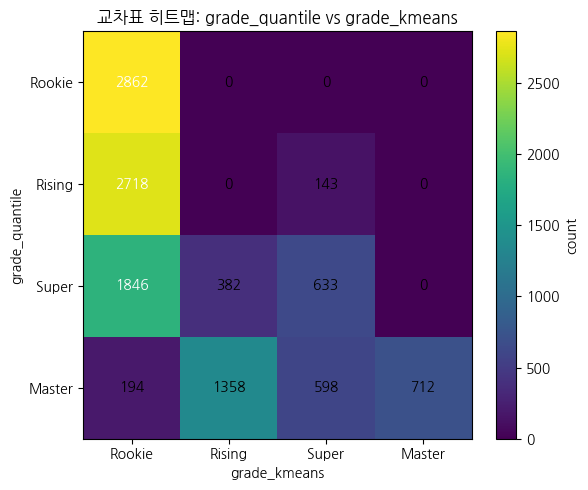

[saved] /content/heatmap_grade_crosstab.png


In [15]:
# === 시각화 & 요약 ===
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 등급 순서 & 색상(원하면 바꿔도 됨)
GRADE_ORDER = ["Rookie","Rising","Super","Master"]
GRADE_COLORS = {
    "Rookie": "#d62728",   # 빨강
    "Rising": "#ff7f0e",   # 주황
    "Super":  "#1f77b4",   # 파랑
    "Master": "#2ca02c"    # 초록
}

# 등급 열을 범주형 & 순서 고정
for col in ["grade_quantile", "grade_kmeans"]:
    if col in df.columns:
        df[col] = pd.Categorical(df[col], categories=GRADE_ORDER, ordered=True)

# 슈퍼호스트 컬럼 정리 (0/1)
raw_super = df.get("host_is_superhost")
if "is_super" not in df.columns:
    if raw_super is not None and getattr(raw_super, "dtype", None) == "O":
        df["is_super"] = raw_super.map({"t":1,"f":0,"true":1,"false":0})
    else:
        df["is_super"] = pd.to_numeric(raw_super, errors="coerce")
df["is_super"] = pd.to_numeric(df["is_super"], errors="coerce")

# 고평점 여부 (≥4.8)
df["is_high_rating"] = (pd.to_numeric(df["review_scores_rating"], errors="coerce") >= 4.8).astype(float)

def boxplot_by_grade(grade_col, filename):
    """등급별 평점 박스플롯"""
    if grade_col not in df.columns:
        print(f"[skip] {grade_col} 없음")
        return
    data = [df.loc[df[grade_col]==g, "review_scores_rating"].dropna().values for g in GRADE_ORDER]
    # 전체가 비었는지 체크
    if all(len(d)==0 for d in data):
        print(f"[skip] {grade_col}에 유효한 평점 없음")
        return
    plt.figure(figsize=(7,5))
    bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)
    # 색상 채우기
    for patch, g in zip(bp['boxes'], GRADE_ORDER):
        patch.set_facecolor(GRADE_COLORS[g])
    plt.title(f"등급별 평점 분포 ({grade_col})")
    plt.xlabel("등급")
    plt.ylabel("평점")
    plt.tight_layout()
    plt.savefig(f"/content/{filename}", dpi=220)
    plt.show()
    print(f"[saved] /content/{filename}")

def bar_rate_by_grade(grade_col, target_col, title, filename):
    """등급별 비율 막대 (슈퍼호스트/고평점 등)"""
    if grade_col not in df.columns:
        print(f"[skip] {grade_col} 없음")
        return
    sub = df[[grade_col, target_col]].dropna()
    if sub.empty:
        print(f"[skip] {grade_col}×{target_col} 유효 표본 없음")
        return
    rate = sub.groupby(grade_col)[target_col].mean().reindex(GRADE_ORDER)
    plt.figure(figsize=(7,5))
    colors = [GRADE_COLORS[g] for g in GRADE_ORDER]
    plt.bar(GRADE_ORDER, rate.values, color=colors, edgecolor="black")
    for i, v in enumerate(rate.fillna(0).values):
        plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel("등급")
    plt.ylabel("비율")
    plt.tight_layout()
    plt.savefig(f"/content/{filename}", dpi=220)
    plt.show()
    print(f"[saved] /content/{filename}")

def pie_distribution(grade_col, filename):
    """등급 분포 파이차트"""
    if grade_col not in df.columns:
        print(f"[skip] {grade_col} 없음")
        return
    counts = df[grade_col].value_counts().reindex(GRADE_ORDER).fillna(0)
    if counts.sum() == 0:
        print(f"[skip] {grade_col} 유효 표본 없음")
        return
    plt.figure(figsize=(6,6))
    plt.pie(
        counts.values,
        labels=GRADE_ORDER,
        autopct="%1.1f%%",
        startangle=90,
        counterclock=False,
        colors=[GRADE_COLORS[g] for g in GRADE_ORDER]
    )
    plt.title(f"호스트 등급 분포 ({grade_col})")
    plt.tight_layout()
    plt.savefig(f"/content/{filename}", dpi=220)
    plt.show()
    print(f"[saved] /content/{filename}")

def heatmap_crosstab(grade_col_a, grade_col_b, filename):
    """두 등급 간 교차표 히트맵 (일치도 확인)"""
    if grade_col_a not in df.columns or grade_col_b not in df.columns:
        print(f"[skip] {grade_col_a}/{grade_col_b} 없음")
        return
    tab = pd.crosstab(df[grade_col_a], df[grade_col_b]).reindex(index=GRADE_ORDER, columns=GRADE_ORDER)
    if tab.sum().sum() == 0:
        print(f"[skip] 교차표 비어있음")
        return
    plt.figure(figsize=(6,5))
    plt.imshow(tab, aspect="auto")
    plt.xticks(range(4), GRADE_ORDER)
    plt.yticks(range(4), GRADE_ORDER)
    plt.colorbar(label="count")
    # 셀 값 표시
    for i in range(4):
        for j in range(4):
            plt.text(j, i, int(tab.iloc[i, j]), ha="center", va="center", color="white" if tab.values[i, j] > tab.values.max()/2 else "black")
    plt.title(f"교차표 히트맵: {grade_col_a} vs {grade_col_b}")
    plt.xlabel(grade_col_b)
    plt.ylabel(grade_col_a)
    plt.tight_layout()
    plt.savefig(f"/content/{filename}", dpi=220)
    plt.show()
    print(f"[saved] /content/{filename}")

# ---- 실제 호출 (원하는 것만 실행해도 됨) ----
# 박스플롯
boxplot_by_grade("grade_kmeans",   "box_rating_by_grade_kmeans.png")
boxplot_by_grade("grade_quantile", "box_rating_by_grade_quantile.png")

# 비율 막대 (슈퍼호스트 / 고평점)
bar_rate_by_grade("grade_kmeans",   "is_super",      "등급별 슈퍼호스트 비율 (KMeans)",   "bar_super_rate_kmeans.png")
bar_rate_by_grade("grade_quantile", "is_super",      "등급별 슈퍼호스트 비율 (Quantile)", "bar_super_rate_quantile.png")
bar_rate_by_grade("grade_kmeans",   "is_high_rating","등급별 고평점(≥4.8) 비율 (KMeans)", "bar_high_rate_kmeans.png")
bar_rate_by_grade("grade_quantile", "is_high_rating","등급별 고평점(≥4.8) 비율 (Quantile)", "bar_high_rate_quantile.png")

# 파이차트 (등급 분포)
pie_distribution("grade_kmeans",   "pie_grade_kmeans.png")
pie_distribution("grade_quantile", "pie_grade_quantile.png")

# 교차 히트맵 (일치도 시각화)
heatmap_crosstab("grade_quantile", "grade_kmeans", "heatmap_grade_crosstab.png")

----

### 이건 변수가 다 리뷰 관련 변수들이 나왔어요... ㅜ

선택된 상위 변수: ['review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_checkin']

=== 등급별 기준 요약 (Hybrid(KMeans on Quantile-space)) ===
              review_scores_rating_mean  review_scores_rating_median  \
grade_hybrid                                                           
Master                             4.95                         5.00   
Rising                             4.65                         4.72   
Rookie                             4.30                         4.46   
Super                              4.85                         4.88   

              number_of_reviews_mean  number_of_reviews_median  \
grade_hybrid                                                     
Master                         38.52                       8.0   
Rising                         71.38                      31.0   
Rookie                         53.80                      21.0   
Super                         106.25 

/tmp/ipython-input-397310317.py:145: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)


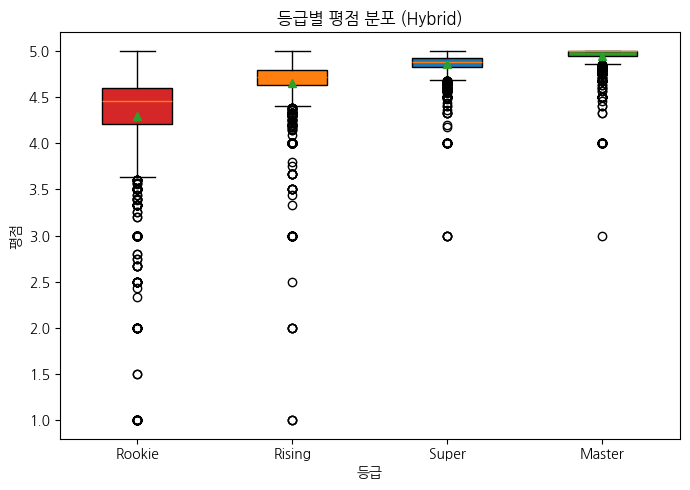

[saved] /content/box_rating_hybrid.png


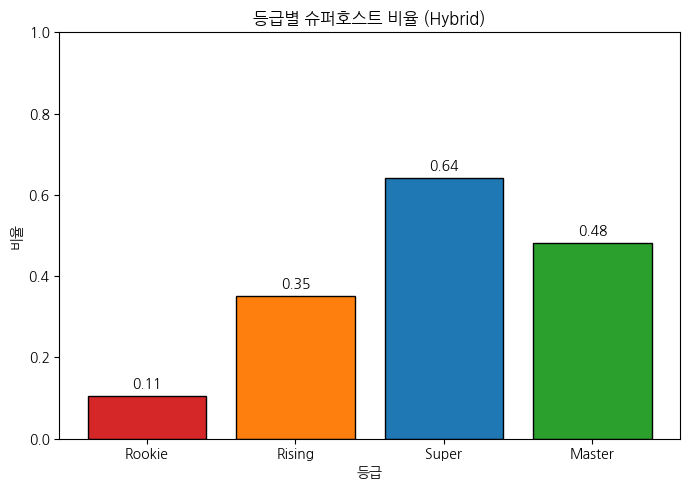

[saved] /content/bar_super_rate_hybrid.png


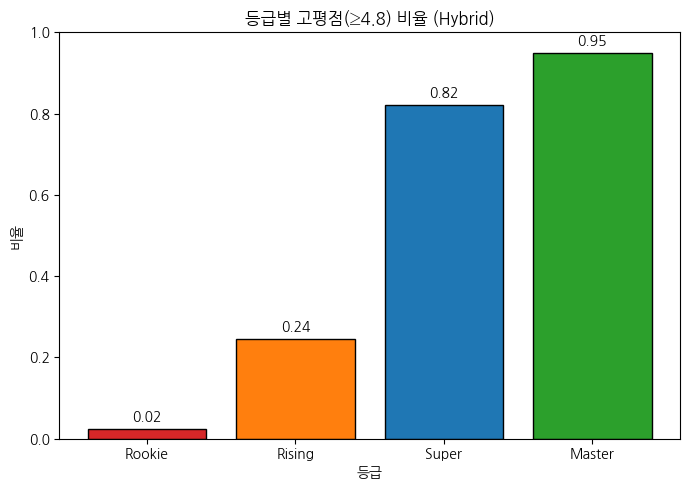

[saved] /content/bar_high_rate_hybrid.png


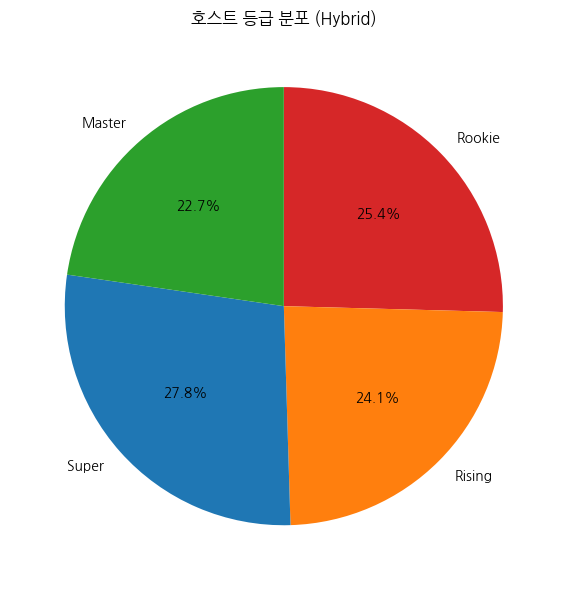

[saved] /content/pie_grade_hybrid.png

[saved] /content/grades_hybrid_with_bins.csv


In [16]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# =========================
# 설정
# =========================
PATH = "/content/combined_dataset.csv"
TOP_VARS = 5           # 결과(평점)와의 상관으로 뽑을 수치 변수 개수
MIN_NONNA_RATIO = 0.7  # 변수 선택에 필요한 최소 비결측 비율
USE_CONTINUOUS_AUX = False  # True면 사분위 벡터에 더해 표준화 연속값도 합쳐서 KMeans

GRADE_ORDER  = ["Rookie","Rising","Super","Master"]
GRADE_COLORS = {"Rookie":"#d62728","Rising":"#ff7f0e","Super":"#1f77b4","Master":"#2ca02c"}

# =========================
# 1) 데이터/타깃 준비
# =========================
df = pd.read_csv(PATH)

rating = pd.to_numeric(df.get("review_scores_rating"), errors="coerce")
is_super = df.get("host_is_superhost")
if is_super is not None and getattr(is_super, "dtype", None) == "O":
    is_super = is_super.map({"t":1,"f":0,"true":1,"false":0})
is_super = pd.to_numeric(is_super, errors="coerce")

# 후보 수치 변수(식별/타깃 제외)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns
            if c not in ["id","review_scores_rating"]]

# 결측 적은 변수만 후보로
num_cols = [c for c in num_cols if df[c].notna().mean() >= MIN_NONNA_RATIO and df[c].nunique(dropna=True) >= 2]

# =========================
# 2) 결과 기반 상위 변수 선택 (pairwise corr)
# =========================
corrs = {}
for c in num_cols:
    try:
        corrs[c] = abs(df[c].corr(rating, method="pearson"))
    except Exception:
        corrs[c] = 0.0

top_vars = sorted(corrs, key=corrs.get, reverse=True)[:TOP_VARS]
if len(top_vars) == 0:
    raise ValueError("상관으로 선택된 수치 변수가 없습니다. MIN_NONNA_RATIO를 낮추거나 데이터 컬럼을 확인하세요.")
print("선택된 상위 변수:", top_vars)

# 유효 표본(선택변수 + 평점 결측 제거)
need_cols = top_vars + ["review_scores_rating"]
idx_valid = df[need_cols].dropna().index
X_raw = df.loc[idx_valid, top_vars].copy()
y_rating = rating.loc[idx_valid].copy()
y_super  = is_super.loc[idx_valid].copy()

# =========================
# 3) 사분위 벡터 만들기 (분위+순위 기반, 중복 경계 안전)
# =========================
def quantile_bins(series, n_bins=4):
    """연속값 -> 분위 랭크(0~1) -> qcut(0..n-1). 실패 시 균등 cut 폴백."""
    s = pd.to_numeric(series, errors="coerce")
    # rank percent (0~1)
    r = (s.rank(method="average") - 1) / (s.notna().sum() - 1) if s.notna().sum() > 1 else s*0
    r = r.fillna(0.5)  # 단일값 대비
    try:
        b = pd.qcut(r, n_bins, labels=list(range(n_bins)), duplicates="drop")
        if getattr(b, "cat", None) is not None and b.cat.categories.size < n_bins:
            raise ValueError
    except Exception:
        # 균등 간격으로 강제 분할
        b = pd.cut(r, bins=np.linspace(0,1,n_bins+1), labels=list(range(n_bins)), include_lowest=True)
    return b.astype(float)

# 각 변수별 사분위 bin (0,1,2,3)
Qmat = pd.DataFrame({f"{c}__qbin": quantile_bins(X_raw[c]) for c in top_vars}, index=X_raw.index)

# 보조로 연속 표준화 값 사용 옵션
if USE_CONTINUOUS_AUX:
    Z = StandardScaler().fit_transform(X_raw.values)
    Z = pd.DataFrame(Z, index=X_raw.index, columns=[f"{c}__z" for c in top_vars])
    X_hybrid = pd.concat([Qmat, Z], axis=1)
else:
    X_hybrid = Qmat.copy()

# 혹시라도 남은 결측 제거(거의 없지만 방어)
X_hybrid = X_hybrid.dropna()
y_rating = y_rating.loc[X_hybrid.index]
y_super  = y_super.loc[X_hybrid.index]

if len(X_hybrid) < 10:
    raise ValueError("유효 표본이 너무 적어 KMeans를 안정적으로 수행하기 어렵습니다.")

# =========================
# 4) KMeans(4) on 사분위+연속 하이브리드 공간
# =========================
kmeans = KMeans(n_clusters=4, n_init=50, random_state=42)
clusters = kmeans.fit_predict(X_hybrid.values)

# 평균 평점 낮→높 순으로 Rookie→Master 매핑
order = (pd.DataFrame({"c":clusters, "rating":y_rating})
         .groupby("c")["rating"].mean().sort_values().index.tolist())
c2g = {order[i]:g for i,g in enumerate(GRADE_ORDER)}
grade_hybrid = pd.Series(clusters, index=X_hybrid.index, name="grade_hybrid").map(c2g)

# =========================
# 5) 등급별 요약 표 (리뷰/예약/평점)
# =========================
book_cands = ["bookings_count","reservations_count","reservation_count",
              "total_bookings","confirmed_bookings","bookings_count_est"]
book_col = next((c for c in book_cands if c in df.columns), None)
review_col = "number_of_reviews" if "number_of_reviews" in df.columns else None
rating_col = "review_scores_rating"

def make_summary(grade_s, label):
    cols = [rating_col]
    if review_col: cols.append(review_col)
    if book_col:   cols.append(book_col)
    tmp = pd.concat([grade_s, df.loc[grade_s.index, cols]], axis=1).dropna()
    if tmp.empty:
        print(f"[{label}] 요약 불가: 유효 표본 없음")
        return None
    agg = {rating_col:["mean","median"]}
    if review_col: agg[review_col] = ["mean","median","min","max"]
    if book_col:   agg[book_col]   = ["mean","median","min","max"]
    summ = tmp.groupby(grade_s.name).agg(agg).round(2)
    summ.columns = ["_".join(filter(None, c)).strip("_") for c in summ.columns.to_flat_index()]
    print(f"\n=== 등급별 기준 요약 ({label}) ===")
    print(summ)
    return summ

summ_h = make_summary(grade_hybrid, "Hybrid(KMeans on Quantile-space)")

# =========================
# 6) 시각화 (박스/막대/파이)
# =========================
def boxplot_by_grade(grade_s, title, path):
    data = [df.loc[grade_s.index][grade_s==g]["review_scores_rating"].dropna().values for g in GRADE_ORDER]
    if all(len(d)==0 for d in data):
        print("[skip] 박스플롯: 유효한 평점 없음")
        return
    plt.figure(figsize=(7,5))
    bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)
    for patch, g in zip(bp["boxes"], GRADE_ORDER):
        patch.set_facecolor(GRADE_COLORS[g])
    plt.title(title); plt.xlabel("등급"); plt.ylabel("평점")
    plt.tight_layout(); plt.savefig(path, dpi=220); plt.show(); print("[saved]", path)

def bar_rate_by_grade(grade_s, target_col, title, path):
    sub = pd.concat([grade_s, df.loc[grade_s.index, target_col]], axis=1).dropna()
    if sub.empty:
        print("[skip] 막대: 유효 표본 없음"); return
    rate = sub.groupby(grade_s.name)[target_col].mean().reindex(GRADE_ORDER)
    plt.figure(figsize=(7,5))
    plt.bar(GRADE_ORDER, rate.values, color=[GRADE_COLORS[g] for g in GRADE_ORDER], edgecolor="black")
    for i,v in enumerate(rate.fillna(0).values): plt.text(i, v+0.02, f"{v:.2f}", ha="center")
    plt.ylim(0,1); plt.title(title); plt.xlabel("등급"); plt.ylabel("비율")
    plt.tight_layout(); plt.savefig(path, dpi=220); plt.show(); print("[saved]", path)

def pie_distribution(grade_s, title, path):
    counts = grade_s.value_counts().reindex(GRADE_ORDER).fillna(0)
    if counts.sum() == 0: print("[skip] 파이: 비어있음"); return
    plt.figure(figsize=(6,6))
    plt.pie(counts.values, labels=GRADE_ORDER, autopct="%1.1f%%", startangle=90, counterclock=False,
            colors=[GRADE_COLORS[g] for g in GRADE_ORDER])
    plt.title(title); plt.tight_layout(); plt.savefig(path, dpi=220); plt.show(); print("[saved]", path)

# 파생 타깃들
df["is_super_num"] = is_super  # 0/1
df["is_high_rating"] = (pd.to_numeric(df["review_scores_rating"], errors="coerce") >= 4.8).astype(float)

# 실제 그리기 (파일은 /content에 저장)
boxplot_by_grade(grade_hybrid, "등급별 평점 분포 (Hybrid)", "/content/box_rating_hybrid.png")
bar_rate_by_grade(grade_hybrid, "is_super_num", "등급별 슈퍼호스트 비율 (Hybrid)", "/content/bar_super_rate_hybrid.png")
bar_rate_by_grade(grade_hybrid, "is_high_rating","등급별 고평점(≥4.8) 비율 (Hybrid)", "/content/bar_high_rate_hybrid.png")
pie_distribution(grade_hybrid, "호스트 등급 분포 (Hybrid)", "/content/pie_grade_hybrid.png")

# =========================
# 7) 저장(선택)
# =========================
out = pd.concat([grade_hybrid.rename("grade_hybrid"), X_raw.loc[grade_hybrid.index, top_vars], Qmat.loc[grade_hybrid.index]], axis=1)
out.to_csv("/content/grades_hybrid_with_bins.csv", index=False)
print("\n[saved] /content/grades_hybrid_with_bins.csv")


----

### 그래서 리뷰와 관련된 변수들 제거 버전입니다!

선택된 상위 변수(리뷰/평점 관련 제외): ['calculated_host_listings_count_private_rooms', 'scrape_id', 'calculated_host_listings_count', 'calculated_host_listings_count_shared_rooms', 'host_listings_count']

=== 등급별 기준 요약 (Hybrid(KMeans on Quantile-space)) ===
              review_scores_rating_mean  review_scores_rating_median  \
grade_hybrid                                                           
Master                             4.80                         4.87   
Rising                             4.59                         4.80   
Rookie                             4.49                         4.62   
Super                              4.71                         4.78   

              number_of_reviews_mean  number_of_reviews_median  \
grade_hybrid                                                     
Master                         85.37                      38.0   
Rising                         38.44                      10.0   
Rookie                         53.98                      1

/tmp/ipython-input-3617679472.py:156: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)


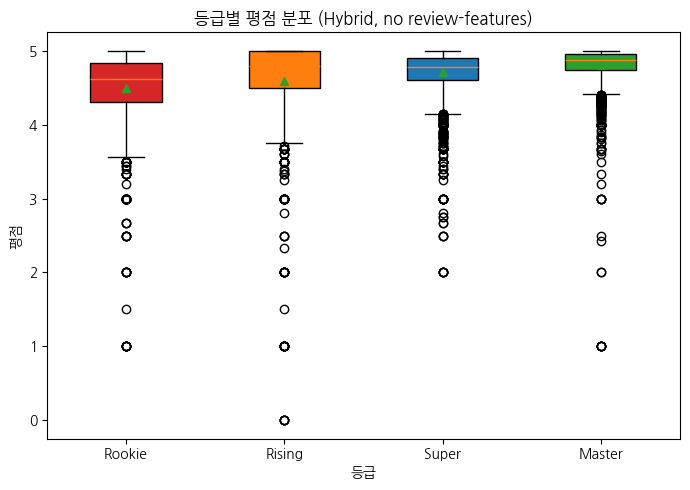

[saved] /content/box_rating_hybrid_no_leak.png


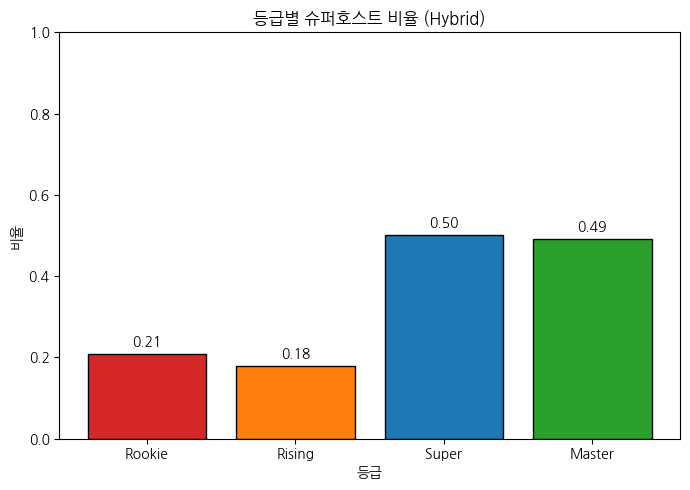

[saved] /content/bar_super_rate_hybrid_no_leak.png


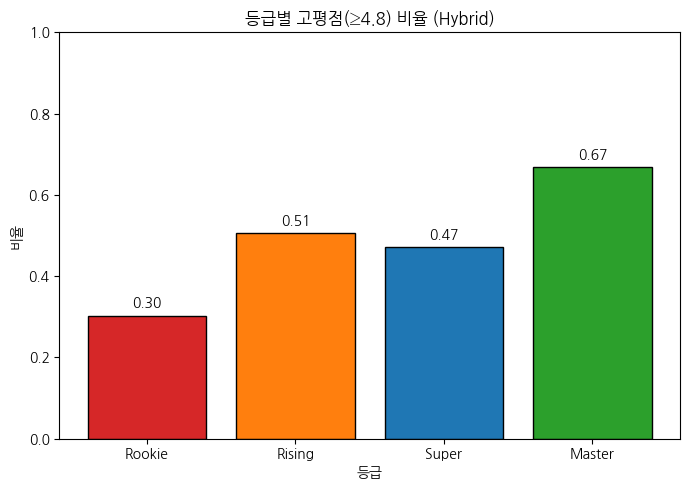

[saved] /content/bar_high_rate_hybrid_no_leak.png


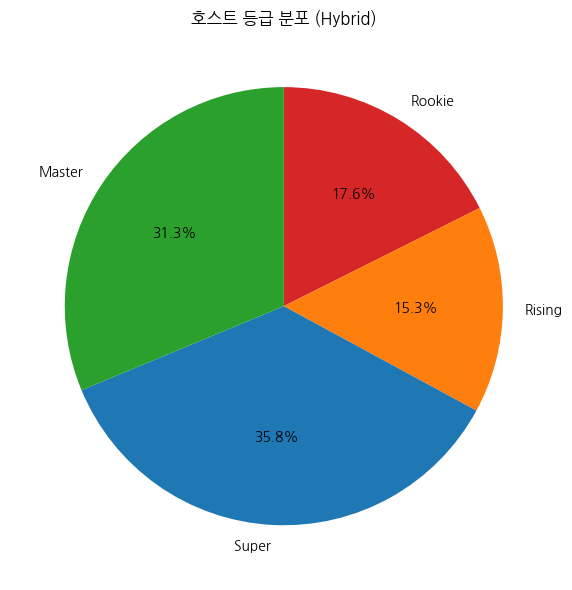

[saved] /content/pie_grade_hybrid_no_leak.png


In [17]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# =========================
# 설정
# =========================
PATH = "/content/combined_dataset.csv"
TOP_VARS = 5
MIN_NONNA_RATIO = 0.7
USE_CONTINUOUS_AUX = False  # True면 사분위 벡터에 표준화 연속값도 추가

GRADE_ORDER  = ["Rookie","Rising","Super","Master"]
GRADE_COLORS = {"Rookie":"#d62728","Rising":"#ff7f0e","Super":"#1f77b4","Master":"#2ca02c"}

# 리뷰/평점 관련(타깃과 직접 연관) 컬럼 제외 패턴
# -> 이름에 아래 토큰이 하나라도 들어가면 제외
LEAKAGE_TOKENS = [
    "review",          # number_of_reviews, reviews_per_month, ...
    "review_scores",   # review_scores_*
    "rating",          # review_scores_rating, overall_rating, ...
    "star"             # star_rating 등
]

def is_leakage(colname: str) -> bool:
    name = str(colname).lower()
    return any(tok in name for tok in LEAKAGE_TOKENS)

# =========================
# 1) 데이터/타깃 준비
# =========================
df = pd.read_csv(PATH)

rating = pd.to_numeric(df.get("review_scores_rating"), errors="coerce")
is_super = df.get("host_is_superhost")
if is_super is not None and getattr(is_super, "dtype", None) == "O":
    is_super = is_super.map({"t":1,"f":0,"true":1,"false":0})
is_super = pd.to_numeric(is_super, errors="coerce")

# 후보 수치 변수: 식별자/타깃/리뷰·평점·리뷰스코어 관련 컬럼 제외
num_cols_all = [c for c in df.select_dtypes(include=[np.number]).columns if c != "review_scores_rating"]
num_cols = [c for c in num_cols_all if c not in ["id", "listing_id", "host_id"] and not is_leakage(c)]

# 결측 적고 값 다양성이 있는 변수만
num_cols = [c for c in num_cols if df[c].notna().mean() >= MIN_NONNA_RATIO and df[c].nunique(dropna=True) >= 2]
if len(num_cols) == 0:
    raise ValueError("사용 가능한 숫자 피처가 없습니다. MIN_NONNA_RATIO를 낮추거나 컬럼 구성을 확인해주세요.")

# =========================
# 2) 결과 기반 상위 변수 선택 (pairwise corr) — 누수 변수는 이미 제외됨
# =========================
corrs = {}
for c in num_cols:
    try:
        corrs[c] = abs(df[c].corr(rating, method="pearson"))
    except Exception:
        corrs[c] = 0.0

top_vars = sorted(corrs, key=corrs.get, reverse=True)[:TOP_VARS]
if len(top_vars) == 0:
    raise ValueError("상관으로 선택된 수치 변수가 없습니다. 파라미터를 조정하세요.")
print("선택된 상위 변수(리뷰/평점 관련 제외):", top_vars)

# 유효 표본(선택변수 + 평점 결측 제거)
need_cols = top_vars + ["review_scores_rating"]
idx_valid = df[need_cols].dropna().index
X_raw = df.loc[idx_valid, top_vars].copy()
y_rating = rating.loc[idx_valid].copy()
y_super  = is_super.loc[idx_valid].copy()

# =========================
# 3) 사분위 벡터(분위 기반) 만들기
# =========================
def quantile_bins(series, n_bins=4):
    """연속값 -> 분위 랭크(0~1) -> qcut(0..n-1). 실패시 균등 cut."""
    s = pd.to_numeric(series, errors="coerce")
    r = (s.rank(method="average") - 1) / (s.notna().sum() - 1) if s.notna().sum() > 1 else s*0
    r = r.fillna(0.5)
    try:
        b = pd.qcut(r, n_bins, labels=list(range(n_bins)), duplicates="drop")
        if getattr(b, "cat", None) is not None and b.cat.categories.size < n_bins:
            raise ValueError
    except Exception:
        b = pd.cut(r, bins=np.linspace(0,1,n_bins+1), labels=list(range(n_bins)), include_lowest=True)
    return b.astype(float)

Qmat = pd.DataFrame({f"{c}__qbin": quantile_bins(X_raw[c]) for c in top_vars}, index=X_raw.index)

# (옵션) 연속 표준화 값 추가
if USE_CONTINUOUS_AUX:
    Z = StandardScaler().fit_transform(X_raw.values)
    Z = pd.DataFrame(Z, index=X_raw.index, columns=[f"{c}__z" for c in top_vars])
    X_hybrid = pd.concat([Qmat, Z], axis=1)
else:
    X_hybrid = Qmat.copy()

X_hybrid = X_hybrid.dropna()
y_rating = y_rating.loc[X_hybrid.index]
y_super  = y_super.loc[X_hybrid.index]

if len(X_hybrid) < 10:
    raise ValueError("유효 표본이 너무 적습니다. MIN_NONNA_RATIO를 낮추거나 데이터 결측을 확인하세요.")

# =========================
# 4) KMeans(4) on 사분위 하이브리드 공간
# =========================
kmeans = KMeans(n_clusters=4, n_init=50, random_state=42)
clusters = kmeans.fit_predict(X_hybrid.values)

# 평균 평점 낮→높 순으로 Rookie→Master 매핑
order = (pd.DataFrame({"c":clusters, "rating":y_rating})
         .groupby("c")["rating"].mean().sort_values().index.tolist())
c2g = {order[i]:g for i,g in enumerate(GRADE_ORDER)}
grade_hybrid = pd.Series(clusters, index=X_hybrid.index, name="grade_hybrid").map(c2g)

# =========================
# 5) 등급별 요약 표 (리뷰/예약/평점) — 타깃은 평점이므로 리뷰 관련은 참고용
# =========================
book_cands = ["bookings_count","reservations_count","reservation_count",
              "total_bookings","confirmed_bookings","bookings_count_est"]
book_col = next((c for c in book_cands if c in df.columns), None)
review_col = "number_of_reviews" if "number_of_reviews" in df.columns else None
rating_col = "review_scores_rating"

def make_summary(grade_s, label):
    cols = [rating_col]
    if review_col: cols.append(review_col)
    if book_col:   cols.append(book_col)
    tmp = pd.concat([grade_s, df.loc[grade_s.index, cols]], axis=1).dropna()
    if tmp.empty:
        print(f"[{label}] 요약 불가: 유효 표본 없음")
        return None
    agg = {rating_col:["mean","median"]}
    if review_col: agg[review_col] = ["mean","median","min","max"]
    if book_col:   agg[book_col]   = ["mean","median","min","max"]
    summ = tmp.groupby(grade_s.name).agg(agg).round(2)
    summ.columns = ["_".join(filter(None, c)).strip("_") for c in summ.columns.to_flat_index()]
    print(f"\n=== 등급별 기준 요약 ({label}) ===")
    print(summ)
    return summ

summ_h = make_summary(grade_hybrid, "Hybrid(KMeans on Quantile-space)")

# =========================
# 6) 시각화 (박스/막대/파이)
# =========================
def boxplot_by_grade(grade_s, title, path):
    data = [df.loc[grade_s.index][grade_s==g]["review_scores_rating"].dropna().values for g in GRADE_ORDER]
    if all(len(d)==0 for d in data):
        print("[skip] 박스플롯: 유효한 평점 없음")
        return
    plt.figure(figsize=(7,5))
    bp = plt.boxplot(data, labels=GRADE_ORDER, showmeans=True, patch_artist=True)
    for patch, g in zip(bp["boxes"], GRADE_ORDER):
        patch.set_facecolor(GRADE_COLORS[g])
    plt.title(title); plt.xlabel("등급"); plt.ylabel("평점")
    plt.tight_layout(); plt.savefig(path, dpi=220); plt.show(); print("[saved]", path)

def bar_rate_by_grade(grade_s, target_col, title, path):
    sub = pd.concat([grade_s, df.loc[grade_s.index, target_col]], axis=1).dropna()
    if sub.empty:
        print("[skip] 막대: 유효 표본 없음"); return
    rate = sub.groupby(grade_s.name)[target_col].mean().reindex(GRADE_ORDER)
    plt.figure(figsize=(7,5))
    plt.bar(GRADE_ORDER, rate.values, color=[GRADE_COLORS[g] for g in GRADE_ORDER], edgecolor="black")
    for i,v in enumerate(rate.fillna(0).values): plt.text(i, v+0.02, f"{v:.2f}", ha="center")
    plt.ylim(0,1); plt.title(title); plt.xlabel("등급"); plt.ylabel("비율")
    plt.tight_layout(); plt.savefig(path, dpi=220); plt.show(); print("[saved]", path)

def pie_distribution(grade_s, title, path):
    counts = grade_s.value_counts().reindex(GRADE_ORDER).fillna(0)
    if counts.sum() == 0: print("[skip] 파이: 비어있음"); return
    plt.figure(figsize=(6,6))
    plt.pie(counts.values, labels=GRADE_ORDER, autopct="%1.1f%%", startangle=90, counterclock=False,
            colors=[GRADE_COLORS[g] for g in GRADE_ORDER])
    plt.title(title); plt.tight_layout(); plt.savefig(path, dpi=220); plt.show(); print("[saved]", path)

# 파생 타깃들(비율 그래프용)
df["is_super_num"] = is_super
df["is_high_rating"] = (pd.to_numeric(df["review_scores_rating"], errors="coerce") >= 4.8).astype(float)

# 실제 그리기 (파일은 /content 에 저장)
boxplot_by_grade(grade_hybrid, "등급별 평점 분포 (Hybrid, no review-features)", "/content/box_rating_hybrid_no_leak.png")
bar_rate_by_grade(grade_hybrid, "is_super_num", "등급별 슈퍼호스트 비율 (Hybrid)", "/content/bar_super_rate_hybrid_no_leak.png")
bar_rate_by_grade(grade_hybrid, "is_high_rating","등급별 고평점(≥4.8) 비율 (Hybrid)", "/content/bar_high_rate_hybrid_no_leak.png")
pie_distribution(grade_hybrid, "호스트 등급 분포 (Hybrid)", "/content/pie_grade_hybrid_no_leak.png")


In [11]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

PATH = "/content/combined_dataset.csv"
TOP_VARS = 5
MIN_NONNA_RATIO = 0.7       # 변수 후보: 결측 아닌 비율
FALLBACK_NONNA_RATIO = 0.5  # 재시도 기준
MIN_ROWS = 30               # 최소 표본수(너무 적으면 폴백)

df = pd.read_csv(PATH)

# 타깃들
rating = pd.to_numeric(df.get("review_scores_rating"), errors="coerce")
is_super = df.get("host_is_superhost")
if is_super is not None and getattr(is_super, "dtype", None) == "O":
    is_super = is_super.map({"t":1,"f":0,"true":1,"false":0})
is_super = pd.to_numeric(is_super, errors="coerce")

# 숫자 후보(식별자/타깃 제외)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns
            if c not in ["id","review_scores_rating"]]

# 1) 결측 적은 컬럼만 1차 후보
nonna_ratio = {c: df[c].notna().mean() for c in num_cols}
candidates = [c for c in num_cols if nonna_ratio[c] >= MIN_NONNA_RATIO]

# 2) 상관 기반으로 상위 변수 선택 (pairwise로 NaN 무시)
def pick_top_vars(cols, k=TOP_VARS):
    if not cols:
        return []
    corrs = {}
    for c in cols:
        try:
            corrs[c] = abs(df[c].corr(rating, method="pearson"))
        except Exception:
            corrs[c] = 0.0
    return sorted(corrs, key=corrs.get, reverse=True)[:k]

top_vars = pick_top_vars(candidates, TOP_VARS)

# 유효 표본 만들기
def build_valid_dataset(vars_list):
    if not vars_list:
        return None, None, None
    need_cols = vars_list + ["review_scores_rating"]
    idx_valid = df[need_cols].dropna().index
    if len(idx_valid) == 0:
        return None, None, None
    X = df.loc[idx_valid, vars_list].copy()
    y = rating.loc[idx_valid]
    # 방어: 남은 NaN 제거
    mask = X.notna().all(axis=1) & y.notna()
    X, y = X.loc[mask], y.loc[mask]
    return X, y, idx_valid[mask]

X, y_rating, valid_idx = build_valid_dataset(top_vars)

# 표본이 너무 적으면(없거나 부족하면) 재시도: 결측이 적은 컬럼 중심으로
if (X is None) or (len(X) < MIN_ROWS):
    # 결측 기준 완화 + 결측 적은 순으로 추림
    cands2 = [c for c in num_cols if nonna_ratio[c] >= FALLBACK_NONNA_RATIO]
    # 결측 적은 순으로 정렬 후 상위 N개 중에서 상관 상위 뽑기
    cands2 = sorted(cands2, key=lambda c: nonna_ratio[c], reverse=True)[:max(TOP_VARS*2, 10)]
    top_vars = pick_top_vars(cands2, TOP_VARS)
    X, y_rating, valid_idx = build_valid_dataset(top_vars)

# 여전히 부족하면 → 평점만으로 폴백 (Quantile/KMeans 모두 rating 기반)
FALLBACK_RATING_ONLY = False
if (X is None) or (len(X) < MIN_ROWS):
    rating_nonnull = rating.dropna()
    if len(rating_nonnull) == 0:
        raise ValueError("유효한 평점 데이터가 없어 등급을 만들 수 없습니다.")
    X = rating_nonnull.to_frame(name="rating_only")
    y_rating = rating_nonnull
    valid_idx = rating_nonnull.index
    FALLBACK_RATING_ONLY = True
    top_vars = ["rating_only"]
    print("[fallback] 표본 부족 → 평점(rating)만으로 등급을 산출합니다.")

# ===== 사분위 등급 =====
def quantile_grade(series):
    r = series.rank(method="first")
    try:
        g = pd.qcut(r, 4, labels=["Rookie","Rising","Super","Master"], duplicates="drop")
        if getattr(g, "cat", None) is not None and g.cat.categories.size < 4:
            raise ValueError
    except Exception:
        g = pd.cut(r, bins=4, labels=["Rookie","Rising","Super","Master"], include_lowest=True)
    return pd.Series(g, index=series.index, name="grade_quantile")

score = X.sum(axis=1) if not FALLBACK_RATING_ONLY else y_rating
grade_q = quantile_grade(score)

# ===== KMeans 등급 =====
def kmeans_grade(Xmat, y_ref):
    scaler = StandardScaler()
    Z = scaler.fit_transform(Xmat.values.reshape(-1,1) if Xmat.ndim==1 or Xmat.shape[1]==1 else Xmat.values)
    km = KMeans(n_clusters=4, n_init=50, random_state=42)
    labels = km.fit_predict(Z)
    # 평균 평점 낮→높 = Rookie→Master 매핑
    order = (pd.DataFrame({"c":labels, "rating":y_ref})
             .groupby("c")["rating"].mean().sort_values().index.tolist())
    c2g = {order[i]: g for i, g in enumerate(["Rookie","Rising","Super","Master"])}
    return pd.Series(labels, index=y_ref.index, name="grade_kmeans").map(c2g)

grade_k = kmeans_grade(X if not FALLBACK_RATING_ONLY else y_rating.to_frame(), y_rating)

# ===== 최종 등급 (합의) =====
grade_map = {"Rookie":0, "Rising":1, "Super":2, "Master":3}
inv_map  = {v:k for k,v in grade_map.items()}

gq_idx = grade_q.map(grade_map)
gk_idx = grade_k.map(grade_map)
final_idx = np.rint((gq_idx + gk_idx)/2).astype(int).clip(0,3)
grade_final = final_idx.map(inv_map)
grade_final.name = "grade_final"

# ===== 요약표 (리뷰/예약/평점) =====
book_cands = ["bookings_count","reservations_count","reservation_count",
              "total_bookings","confirmed_bookings","bookings_count_est"]
book_col = next((c for c in book_cands if c in df.columns), None)
review_col = "number_of_reviews" if "number_of_reviews" in df.columns else None
rating_col = "review_scores_rating"

def make_summary(grade_series, label):
    cols = [rating_col]
    if review_col: cols.append(review_col)
    if book_col:   cols.append(book_col)
    tmp = pd.concat([grade_series, df.loc[grade_series.index, cols]], axis=1).dropna()
    if tmp.empty:
        print(f"\n[{label}] 요약 불가: 유효 표본 없음")
        return None
    agg = {rating_col:["mean","median"]}
    if review_col: agg[review_col] = ["mean","median","min","max"]
    if book_col:   agg[book_col]   = ["mean","median","min","max"]
    summ = tmp.groupby(grade_series.name).agg(agg).round(2)
    summ.columns = ["_".join(filter(None, c)).strip("_") for c in summ.columns.to_flat_index()]
    print(f"\n=== 등급별 기준 요약표 ({label}) ===")
    print(summ)
    return summ

grade_q.name = "grade_quantile"
summ_q = make_summary(grade_q, "Quantile")
summ_k = make_summary(grade_k, "KMeans")
grade_final.name = "grade_final"
summ_f = make_summary(grade_final, "Final")

# 원본 df에 등급 붙이기(유효 표본에 한함)
df.loc[valid_idx, "grade_quantile"] = grade_q.values
df.loc[valid_idx, "grade_kmeans"]   = grade_k.values
df.loc[valid_idx, "grade_final"]    = grade_final.values

# 저장(선택)
out_cols = ["grade_quantile","grade_kmeans","grade_final", rating_col]
if review_col: out_cols.append(review_col)
if book_col:   out_cols.append(book_col)
df.loc[valid_idx, out_cols].to_csv("/mnt/data/grades_and_summary_base.csv", index=False)

print("\n[done] 등급 산출 완료")
print("- /mnt/data/grades_and_summary_base.csv")


TypeError: Object with dtype category cannot perform the numpy op add